##  Projet 2 Analyse de données de systèmes éducatifs  


###  Introduction

**ACADEMY** est une start-up de la EdTech qui propose des contenus de **formation en ligne pour un public de niveau lycée et université.**

Un projet d’expansion à l’international de l’entreprise nécessite une analyse exploratoire pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

### Mission

réaliser une analyse pré-exploratoire du jeu de données sur l'éducation de la banque mondiale afin de :
 
Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)

Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)

Sélectionner les colonnes qui contiennent informations pertinentes pour répondre à la problématique de l’entreprise ?)

Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)
 
 
 Ensuite il faut voir si cette analyse peut répondre aux questions suivantes:\
 
Quels sont les pays avec un fort potentiel de clients pour nos services ?
        
Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
        
 Dans quels pays l'entreprise doit-elle opérer en priorité ?


### Source
: https://datacatalog.worldbank.org/dataset/education-statistics 

: http://datatopics.worldbank.org/education/


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm  
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
%matplotlib inline
pd.set_option('display.max_columns',250)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',250)

In [2]:
## affiche le nombre de lignes , de colonnes , la taille totale , le nomnbre et le % de cellules manquantes

def cont(df):
    # nombre de lignes et colonnes
    nb_raw,nb_col=df.shape
    # nombre de valeurs manquantes
    val_na=df.isna().sum().sum()
    # % de données manquantes
    ratio_na=round(df.isna().sum().sum()/(nb_raw*nb_col)*100,2)
    print('taille totale du jeu de donnees :' ,nb_raw*nb_col)
    print() 
    print('nombre de lignes :',nb_raw,'                            nombre de colonnes :', nb_col)
    print()      
    print('nombre de valeurs manquantes :',val_na,'          % de valeurs manquantes :', ratio_na)
  

In [3]:
### affichage headmap avec valeurs manquantes

def viz_na(df):
    
    plt.figure(figsize=(6,6))
    ax = sns.heatmap(df.isna(),cmap="Blues",cbar=False)
    plt.title('Visualisation des valeurs manquantes ',font='Arial',fontsize=24)
    plt.show()


In [4]:
## fonction qui ajoute 2 lignes à la fonction describe()  (le type de données et le nb de valeurs null)

def detail (df):
    
    nb_li = df.index.size                                                                    ## nombre de lignes
    nb_col = df.columns.size                                                                 ## nombre de colonnes
    tot = nb_li*nb_col                                                                       ## taille totale de la df
    info = pd.DataFrame(df.dtypes).T.rename(index={0:'Type'})                                ## ajout le dtypes de chaque colonne et renomme index en Type  dans la dataframe info
    info = info.append(pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}))             ##  ajout la somme des null de chaque colonne et renomme l'index en null dans la dataframe info
    inf_data = df.describe(include='all')                                                    ## résultat de la commande describe(include('all')) stocké dans inf_data
    info= info.append(inf_data)                                                              ## ajout de inf_data a info
    return info

In [5]:
### afficher le nombre de variables par type  et le pourcentage de chaque type

def type_var(df):
    print("Variables")
    print('---------')
    nb=df.dtypes.value_counts()
    nb_tot=nb.sum()
    pourcentage=round((100*nb/nb_tot),2)
    table=pd.concat([nb,pourcentage],axis=1)
    table.columns=[ 'Nombre' , '% ']
    display(table[table['Nombre']!=0]
    .sort_values('% ',ascending= False))
    

# 1. Importation et traitement du fichier EdStatsCountry.csv 



In [6]:
# lire le fichier csv
country = pd.read_csv('C:\\Users\\serge\\OneDrive\\Documents\\Documents\\DATA SCIENTIST\\P2\EdStatsCountry.csv ')

In [7]:
# afficher 5 lignes
country.sample(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
204,SVN,Slovenia,Slovenia,Republic of Slovenia,SI,Euro,"A simple multiplier is used to convert the national currencies of EMU members to euros. The following irrevocable euro conversion rate entered into force on January 1, 2007: 1 euro = 239.64 Slovenian tolar. Please note that historical data are not actual euros and are not comparable or suitable for aggregation across countries.",Europe & Central Asia,High income: OECD,SI,Original chained constant price data are rescaled.,2005.0,Value added at basic prices (VAB),NaN,Euro area,Country uses the 1993 System of National Accounts methodology.,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011. Population figures compiled from administrative registers.,"World Health Survey (WHS), 2003","Expenditure survey/budget survey (ES/BS), 2004",Yes,2010,2010.0,2012.0,2009,NaN
196,SOM,Somalia,Somalia,Somali Democratic Republic,SO,Somali shilling,NaN,Sub-Saharan Africa,Low income,SO,1985,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1968 System of National Accounts methodology.,1977–90,NaN,NaN,Estimate,NaN,NaN,NaN,1987,"Multiple Indicator Cluster Survey (MICS), 2006",NaN,NaN,NaN,NaN,NaN,2003,NaN
129,LSO,Lesotho,Lesotho,Kingdom of Lesotho,LS,Lesotho loti,Fiscal year end: March 31; reporting period for national accounts data: CY.,Sub-Saharan Africa,Lower middle income,LS,2004,NaN,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2006,"Demographic and Health Survey (DHS), 2009","Expenditure survey/budget survey (ES/BS), 2002/03",NaN,2010,NaN,2009.0,2000,NaN
85,GRL,Greenland,Greenland,Greenland,GL,Danish krone,NaN,Europe & Central Asia,High income: nonOECD,GL,1990,NaN,NaN,NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,NaN,NaN,General trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
46,CUB,Cuba,Cuba,Republic of Cuba,CU,Cuban peso,NaN,Latin America & Caribbean,Upper middle income,CU,2005,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2012,"Multiple Indicator Cluster Survey (MICS), 2010/11",NaN,Yes,NaN,NaN,2006.0,2007,NaN


In [8]:
# affiche les informations 
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [9]:
# la colonne 31 Unnamed ne contient que des nan et peut être supprimée
country.dropna(axis='columns',how='all',inplace=True)   #supprime les colonnes avec 0 non-null

In [10]:
#on vérifie la présence de doublons dans le set
print(f'Nombre de doublons dans le dataset :', country.duplicated().sum())
# on vérifie la présence de doublons dans la colonne Country Code
#print(f'Nombre de doublons sur le Country Code :', country[country.duplicated(['Country Code'], keep=False)].sum())
print(f'Nombre de doublons sur le Country Code :',country.duplicated(['Country Code']).sum())

Nombre de doublons dans le dataset : 0
Nombre de doublons sur le Country Code : 0


In [11]:
# renvoie la taille ,le nbre de lignes ,le nbre de colonnes ,le nbre de valeurs manquantes et %
cont(country)

taille totale du jeu de donnees : 7471

nombre de lignes : 241                             nombre de colonnes : 31

nombre de valeurs manquantes : 2113           % de valeurs manquantes : 28.28


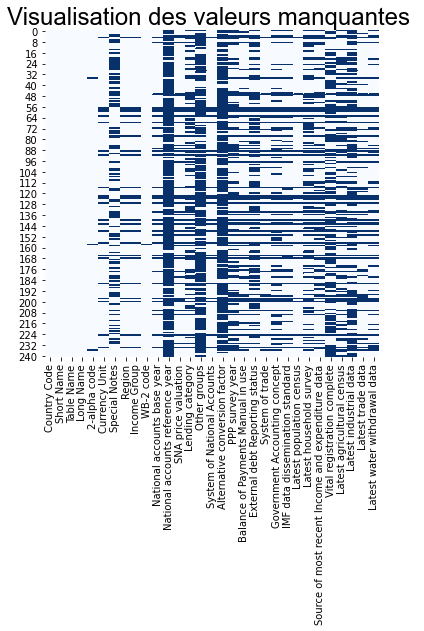

In [12]:
#heatmap du jeu de donnée avec valeur nan
viz_na(country)

In [13]:
#retourne le nombre de variables , le type et le %
type_var(country)

Variables
---------


,Nombre,%
object,28,90.32
float64,3,9.68


In [14]:
# affiche les champs numériques
country.describe()

,National accounts reference year,Latest industrial data,Latest trade data
count,32.00000,107.000000,185.000000
mean,2001.53125,2008.102804,2010.994595
std,5.24856,2.616834,2.569675
min,1987.00000,2000.000000,1995.000000
25%,1996.75000,2007.500000,2011.000000
50%,2002.00000,2009.000000,2012.000000
75%,2005.00000,2010.000000,2012.000000
max,2012.00000,2010.000000,2012.000000


In [15]:
country.describe(exclude =(np.number))

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest water withdrawal data
count,241,241,241,241,238,215,145,214,214,240,205,197,144,58,215,47,145,181,124,200,161,181,213,141,160,111,142,179
unique,241,241,241,241,238,152,131,7,5,240,43,2,3,2,3,32,3,1,3,2,2,2,27,60,75,2,35,20
top,BWA,Uzbekistan,Uzbekistan,Republic of Tunisia,OM,Euro,"April 2012 database update: Based on official government statistics, national accounts data were revised for 2000 onward; the base year changed to 2006.",Europe & Central Asia,Upper middle income,OM,2005,Value added at basic prices (VAB),IBRD,HIPC,Country uses the 1993 System of National Accounts methodology.,1990–95,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2012",Yes,2010,2000
freq,1,1,1,1,1,23,6,57,55,1,34,163,67,40,165,8,98,181,107,106,95,110,59,10,15,110,36,40


On constate qu'il y a 241 'Country code' et seulement 214 Region dans le set de données 

In [16]:
### les régions , zones,continents,... qui ne sont pas des pays ont la valeur nan dans le champs Region
liste_zone=country.loc[country['Region'].isnull()]['Short Name']
liste_zone=liste_zone.reset_index()

In [17]:
### afficher les régions du monde
liste_zone['Short Name']

0                                         Arab World
1              East Asia & Pacific (developing only)
2            East Asia & Pacific (all income levels)
3            Europe & Central Asia (developing only)
4          Europe & Central Asia (all income levels)
5                                          Euro area
6                                     European Union
7                                          Gibraltar
8                                        High income
9             Heavily indebted poor countries (HIPC)
10       Latin America & Caribbean (developing only)
11     Latin America & Caribbean (all income levels)
12      Least developed countries: UN classification
13                                        Low income
14                               Lower middle income
15                               Low & middle income
16    Middle East & North Africa (all income levels)
17                                     Middle income
18      Middle East & North Africa (developing

In [18]:
# les pays ont un une valeur non null dans la colonne Region 
liste_pays=country.loc[~country['Region'].isnull()]['Short Name']
liste_pays=liste_pays.reset_index()

In [19]:
liste_pays['Short Name']

0                               Aruba
1                         Afghanistan
2                              Angola
3                             Albania
4                             Andorra
5                United Arab Emirates
6                           Argentina
7                             Armenia
8                      American Samoa
9                 Antigua and Barbuda
10                          Australia
11                            Austria
12                         Azerbaijan
13                            Burundi
14                            Belgium
15                              Benin
16                       Burkina Faso
17                         Bangladesh
18                           Bulgaria
19                            Bahrain
20                        The Bahamas
21             Bosnia and Herzegovina
22                            Belarus
23                             Belize
24                            Bermuda
25                            Bolivia
26          

In [20]:
liste_pays.count()

index         214
Short Name    214
dtype: int64

  ### Le fichier pays contient des données sur 214 pays et 27 régions du monde. (région = partie du monde , groupement par categorie de revenu ou communauté...)

### Afficher le nombre de pays par région du monde

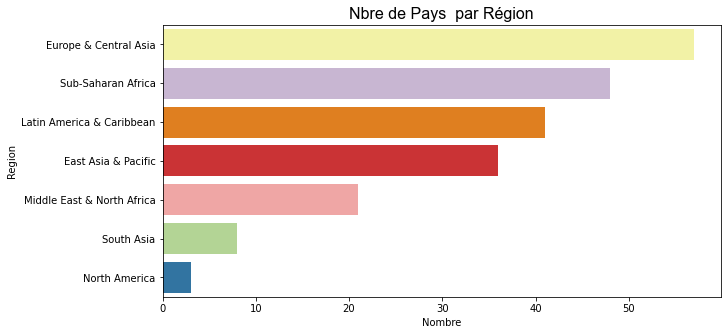

In [21]:
plt.figure(figsize=(10,5))
nb_pays_region=country.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name',ascending=False)
sns.barplot(x=nb_pays_region['Short Name'].sort_values(),y= nb_pays_region['Region'],palette ='Paired_r',)
plt.title('Nbre de Pays  par Région',font='Arial',fontsize=16)
plt.xlabel('Nombre',color='black')

plt.show()



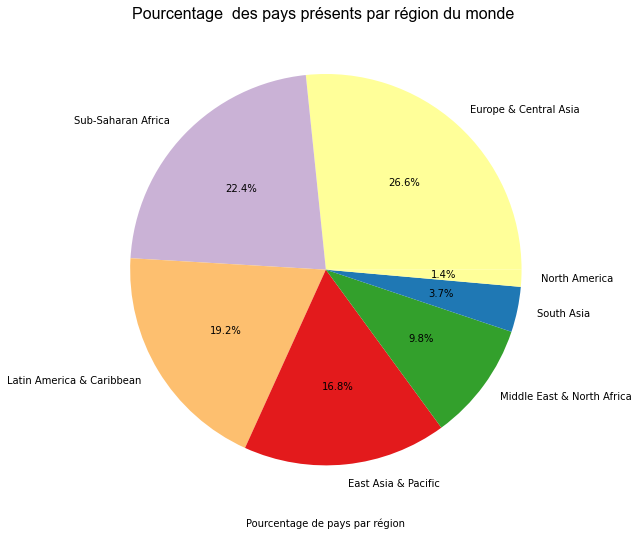

In [22]:
# diagramme circulaire avec pourcentage 1 décimale
plt.figure(figsize=(9,9) )
colors=sns.color_palette('Paired_r')
plt.title('Pourcentage  des pays présents par région du monde ',font='Arial',fontsize=16)
plt.xlabel('Pourcentage de pays par région',color='black')
plt.pie(x=nb_pays_region['Short Name'], labels= nb_pays_region['Region'],colors = colors, autopct = '%1.1f%%',);
plt.show()

### Afficher le nombre de pays par niveau de rentrée (Income group)

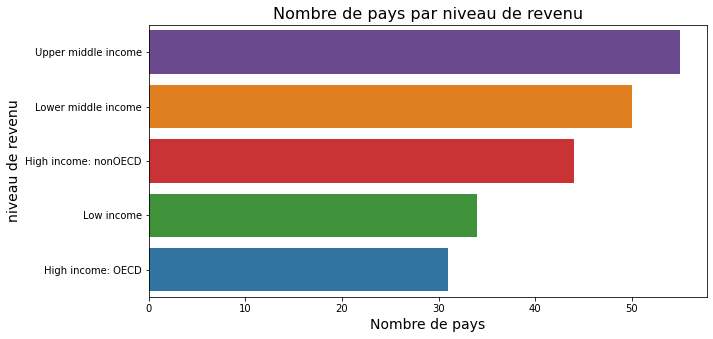

In [23]:
nb_pays_income=country.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=nb_pays_income['Short Name'].sort_values(),y= nb_pays_income['Income Group'], palette='Paired_r',)
plt.xlabel('Nombre de pays', fontsize=14)
plt.ylabel('niveau de revenu', fontsize=14)
plt.title('Nombre de pays par niveau de revenu', fontsize=16);

### les devises les plus présentes triées en ordre décroissant (Currency unit)

In [24]:
# compter les devises et les trier en ordre décroissant
devise_tri=country.groupby('Currency Unit').count()[['Short Name']].sort_values(by="Short Name", ascending=False).reset_index()
#devise_tri

Je conserve les 10 devises les plus utilisées

In [25]:
devise_top10=devise_tri[:10]

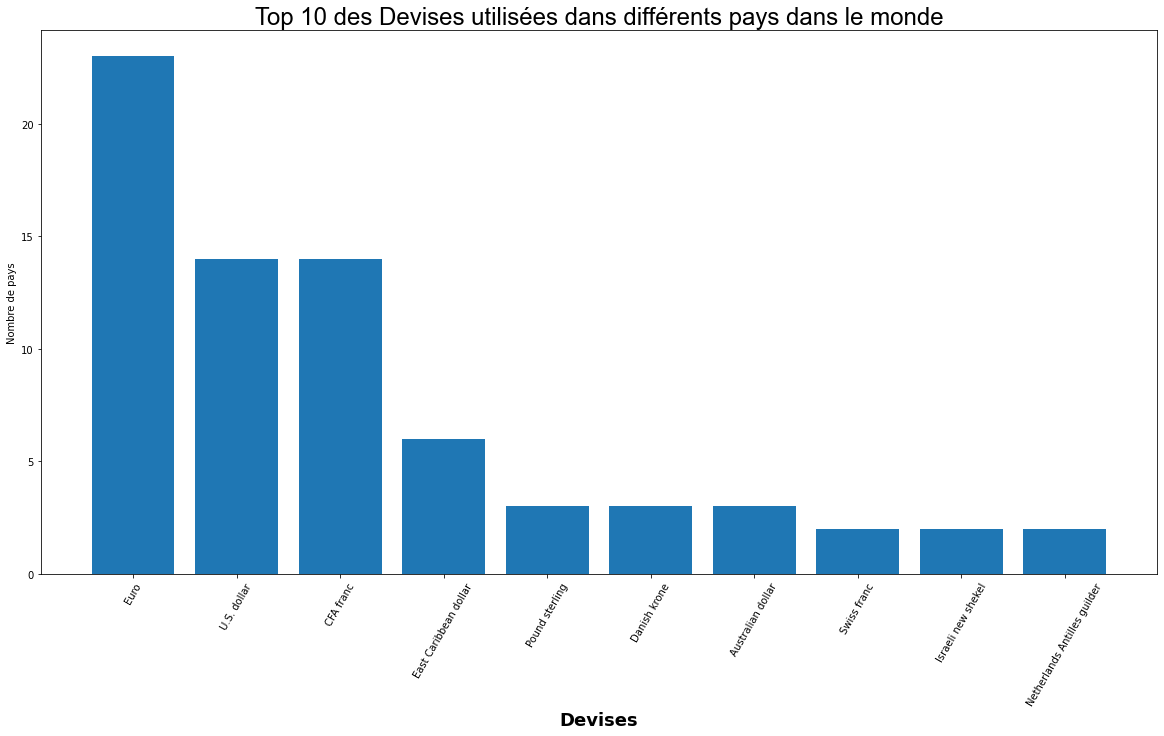

In [26]:
plt.figure(figsize=(20,10))
plt.bar(height=devise_top10['Short Name'],x=devise_top10['Currency Unit'] )
plt.title('Top 10 des Devises utilisées dans différents pays dans le monde',font='Arial',fontsize=24)
plt.xlabel('Devises',color='k',fontweight='bold',fontsize=18)
plt.ylabel("Nombre de pays")
plt.xticks(rotation=60)
plt.show()

voir pour une présentation/ graphique plus clair

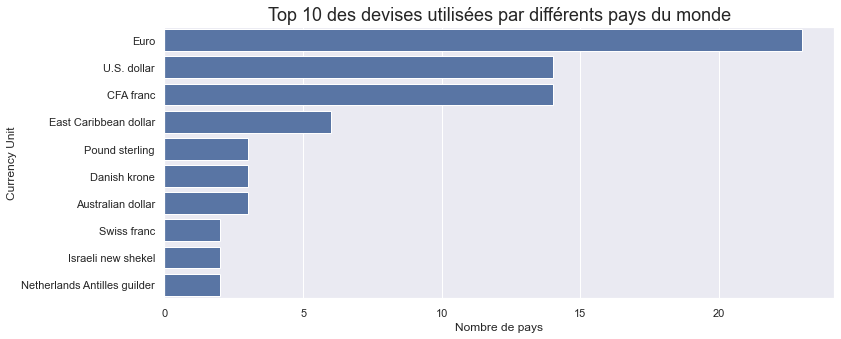

In [27]:
### graphique seaborn bar horizontal
sns.set_theme()
sns.set_palette('dark') 
plt.figure(figsize=(12,5))
labels =devise_top10['Currency Unit']
value =  devise_top10['Short Name']
sns.barplot(x=value,y=labels, color='b') #,palette='bright')
plt.title('Top 10 des devises utilisées par différents pays du monde',font='Arial',fontsize=18)
plt.xlabel("Nombre de pays")

plt.show()

## Résumé de la pré-analyse du jeu de données EdStatsCountry.csv  

Le jeu de donnees contient des informations sur :\
                                les codes ISO-3166 alpha  2\
                                les codes WB-2\
                                les noms des **214 pays**\
                                27 répartitions par région,par niveau de revenus,groupement économique,...\
                                151 devises\
                                5 catégories de niveau de revenu\
                                des données économiques avec les dates des dernières études effectuées
                                
la colonne 31 Unnamed qui ne contenait que des nan a été supprimée.

Le jeu de données restant contient :

                                               nombre de lignes : 241                 nombre de colonnes : 31
                                   nombre de valeurs manquantes : 2113           % de valeurs manquantes : 28.28 
                                taille totale du jeu de donnees : 7471  
  

# 2. Importation et traitement du fichier EdStatsCountry-Series.csv 


In [28]:
 country_serie = pd.read_csv('C:\\Users\\serge\\OneDrive\\Documents\\Documents\\DATA SCIENTIST\\P2\EdStatsCountry-Series.csv ')

In [29]:
country_serie.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN


In [30]:
# la colonne 3 Unnamed :3 ne contient que des nan et peut être supprimée
country_serie.dropna(axis='columns',how='all',inplace=True)   #supprime les colonnes avec 0 non-null

In [31]:
country_serie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  613 non-null    object
 1   SeriesCode   613 non-null    object
 2   DESCRIPTION  613 non-null    object
dtypes: object(3)
memory usage: 14.5+ KB


In [32]:
# on vérifie la présence de doublons dans le dataset
print(f'Nombre de doublons dans le dataset :', country_serie.duplicated().sum())

Nombre de doublons dans le dataset : 0


In [33]:
# nombre et type de variables
type_var(country_serie)

Variables
---------


,Nombre,%
object,3,100.0


### Les valeurs manquantes

In [34]:
cont(country_serie)

taille totale du jeu de donnees : 1839

nombre de lignes : 613                             nombre de colonnes : 3

nombre de valeurs manquantes : 0           % de valeurs manquantes : 0.0


### Les valeurs uniques

In [35]:
country_serie.nunique()

CountryCode    211
SeriesCode      21
DESCRIPTION     97
dtype: int64

### Différence avec les pays contenus dans Country

In [36]:
# Country Code du dataset Country non repris dans CountryCode du dataset country_serie
# affichage du Short Name 
country.loc[~country['Country Code'].isin(country_serie['CountryCode'].unique())]['Short Name'].tolist()

['Arab World',
 'Curaçao',
 'East Asia & Pacific (developing only)',
 'East Asia & Pacific (all income levels)',
 'Europe & Central Asia (developing only)',
 'Europe & Central Asia (all income levels)',
 'Euro area',
 'European Union',
 'High income',
 'Heavily indebted poor countries (HIPC)',
 'Latin America & Caribbean (developing only)',
 'Latin America & Caribbean (all income levels)',
 'Least developed countries: UN classification',
 'Low income',
 'Lower middle income',
 'Low & middle income',
 'St. Martin (French part)',
 'Middle East & North Africa (all income levels)',
 'Middle income',
 'Middle East & North Africa (developing only)',
 'North America',
 'Nauru',
 'OECD members',
 'South Asia',
 'Sub-Saharan Africa (developing only)',
 'South Sudan',
 'Sub-Saharan Africa (all income levels)',
 'Sint Maarten (Dutch part)',
 'Upper middle income',
 'World']

### Différence avec les pays contenus dans la list_zone de Country

In [37]:
# Country Code présents dans la liste et absents dans liste _zone provenant du fichier Country

print(set(country.loc[~country['Country Code'].isin(country_serie['CountryCode'].unique())]['Short Name'].tolist()) ^ set(liste_zone['Short Name'].tolist()))

{'South Sudan', 'Curaçao', 'Gibraltar', 'St. Martin (French part)', 'Sint Maarten (Dutch part)'}


### La colonne SeriesCode

In [38]:
country_serie['SeriesCode'].nunique()

21

In [39]:
country_serie['SeriesCode']

0            SP.POP.TOTL
1            SP.POP.GROW
2            SP.POP.GROW
3      NY.GDP.PCAP.PP.CD
4            SP.POP.TOTL
             ...        
608          SP.POP.GROW
609          SP.POP.GROW
610          SP.POP.TOTL
611          SP.POP.TOTL
612          SP.POP.GROW
Name: SeriesCode, Length: 613, dtype: object

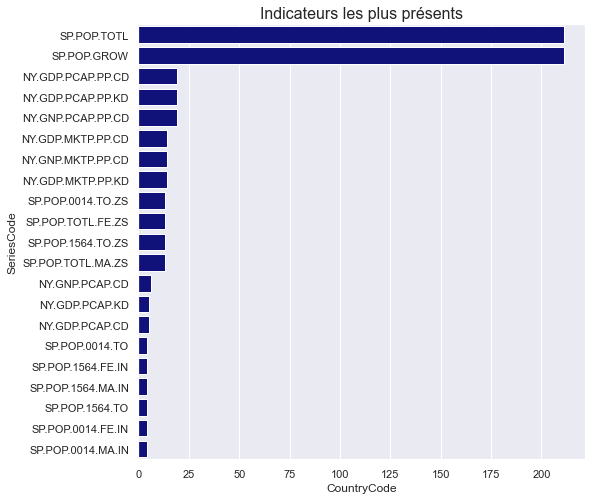

In [40]:
SerieCode_top=country_serie.groupby('SeriesCode').count()[['CountryCode']].reset_index().sort_values(by='CountryCode', ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(data=SerieCode_top,y='SeriesCode' ,x ='CountryCode',color='darkblue')
plt.title('Indicateurs les plus présents',fontsize=16)
plt.show;


### la colonne Description

In [41]:
country_serie['DESCRIPTION'].unique()


array(['Data sources : United Nations World Population Prospects',
       'Data sources: United Nations World Population Prospects',
       'Estimates are based on regression.',
       'Data sources : Institute of Statistics, Eurostat',
       'Data sources : Australian Bureau of Statistics',
       'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
       'Data sources: Australian Bureau of Statistics',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : National Statistical Committee of the Republic of Belarus',
       'Data sources: National Statistical Committee of the Republic of Belarus',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources: Bermuda Government Departme

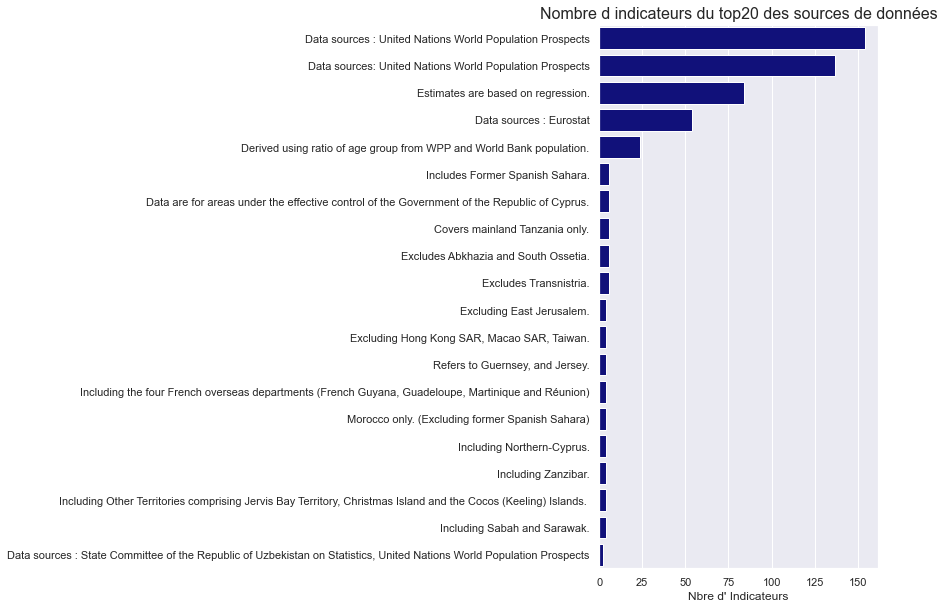

In [42]:
DESCRIPTION_top20=country_serie.groupby('DESCRIPTION').count()[['SeriesCode']].reset_index().sort_values(by='SeriesCode', ascending=False).head(20)

plt.figure(figsize=(5,10))
sns.barplot(data=DESCRIPTION_top20,y='DESCRIPTION' ,x ='SeriesCode',color='darkblue')
plt.title('Nombre d indicateurs du top20 des sources de données',fontsize=16)
plt.ylabel('')
plt.xlabel("Nbre d' Indicateurs")
plt.show;

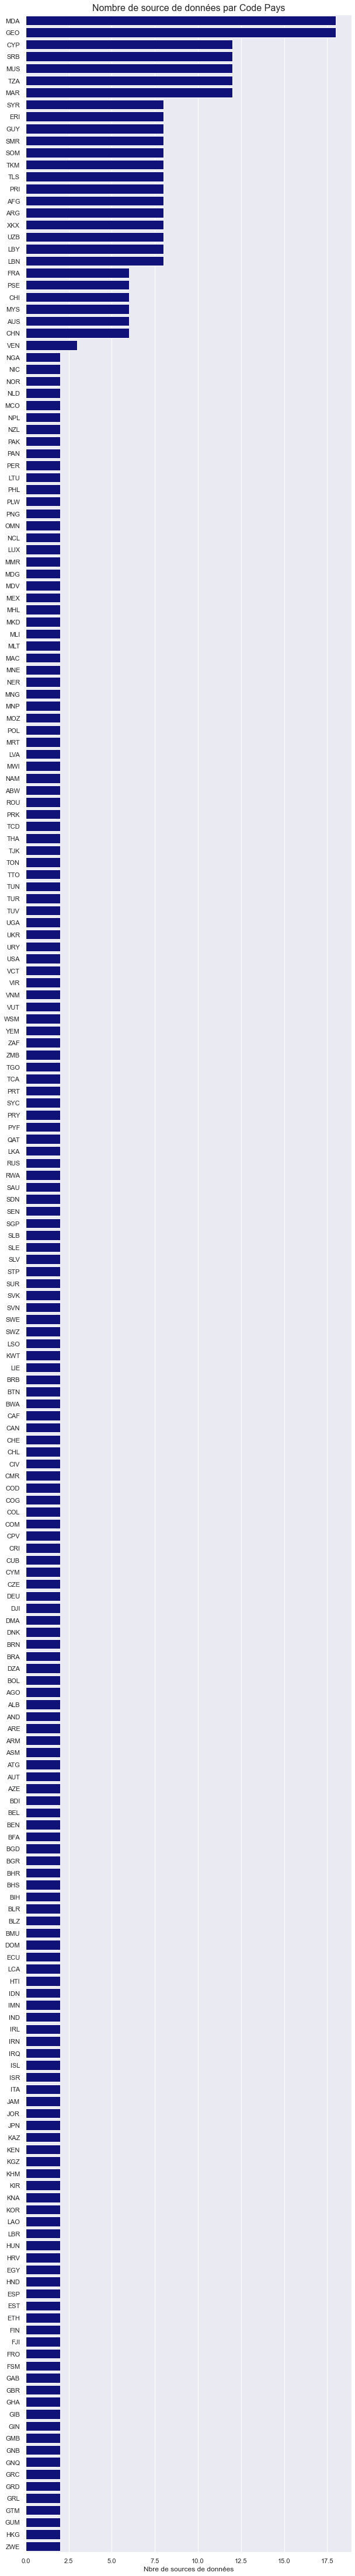

In [43]:
countrycode=country_serie.groupby('CountryCode').count()[['DESCRIPTION']].reset_index().sort_values(by='DESCRIPTION', ascending=False)
plt.figure(figsize=(10,80))
sns.barplot(data=countrycode,y='CountryCode' ,x ='DESCRIPTION',color='darkblue')
plt.title('Nombre de source de données par Code Pays',fontsize=16)
plt.ylabel('')
plt.xlabel("Nbre de sources de données")
plt.show;

Le fichier contient dans la colonne DESCRIPTION les data sources (peu d'intêret pour l'étude)

## Résumé de l'analyse du jeu de données EdStatsCountry-Series.csv  

Le jeu de donnees contient des informations sur :

                                211 countryCode correspondant à 211 pays
                                21 SeriesCode
                                97 DESCRIPTION qui indiquent la source des donnees
                                
la colonne  Unnamed :3 qui ne contenait que des nan a été supprimée.

Le jeu de données restant contient :
                                        
                        nombre de lignes : 613                             nombre de colonnes : 3
                        nombre de valeurs manquantes : 0           % de valeurs manquantes : 0.0
                        taille totale du jeu de donnees : 1839
                        

# 3. Importation et traitement du fichier EdStatsData.csv 

In [44]:
data = pd.read_csv('C:\\Users\\serge\\OneDrive\\Documents\\Documents\\DATA SCIENTIST\\P2\EdStatsData.csv ')

In [45]:
data.head(2)  # affiche les 2 eres lignes

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [47]:
# la colonne 69 Unnamed :69 ne contient que des nan et peut être supprimée
data.dropna(axis='columns',how='all',inplace=True)   #supprime les colonnes avec 0 non-null

In [48]:
# nombre et type de variable
type_var(data)

Variables
---------


,Nombre,%
float64,65,94.2
object,4,5.8


In [49]:
#on vérifie la présence de doublons dans le set
print(f'Nombre de doublons dans le dataset :', data.duplicated().sum())

Nombre de doublons dans le dataset : 0


###  Les indicateurs

In [50]:
# nombre de codes indicateurs distincts
data[['Indicator Code','Indicator Name']].nunique()

Indicator Code    3665
Indicator Name    3665
dtype: int64

Il y a 3665 indicateurs différents

### Les pays et code pays

In [51]:
dim=data.shape
# nombre de country code
data[['Country Code','Country Name']].nunique()

Country Code    242
Country Name    242
dtype: int64

**Il y a 242 Country Code et Country Name .On les compare aux données contenues dans country

In [52]:
print('il y a',data.loc[~data['Country Code'].isin(country['Country Code'].unique())]['Country Name'].nunique(),"pays en plus ")

il y a 1 pays en plus 


In [53]:
data.loc[~data['Country Code'].isin(country['Country Code'].unique())]['Country Name'].unique()

array(['British Virgin Islands'], dtype=object)

#### Y-a-t-il des pays plus documentés que d'autres ?( nombre d'indicateurs par pays)

In [54]:
data.groupby('Country Code')['Indicator Name'].count()

Country Code
ABW    3665
AFG    3665
AGO    3665
ALB    3665
AND    3665
ARB    3665
ARE    3665
ARG    3665
ARM    3665
ASM    3665
ATG    3665
AUS    3665
AUT    3665
AZE    3665
BDI    3665
BEL    3665
BEN    3665
BFA    3665
BGD    3665
BGR    3665
BHR    3665
BHS    3665
BIH    3665
BLR    3665
BLZ    3665
BMU    3665
BOL    3665
BRA    3665
BRB    3665
BRN    3665
BTN    3665
BWA    3665
CAF    3665
CAN    3665
CHE    3665
CHI    3665
CHL    3665
CHN    3665
CIV    3665
CMR    3665
COD    3665
COG    3665
COL    3665
COM    3665
CPV    3665
CRI    3665
CUB    3665
CUW    3665
CYM    3665
CYP    3665
CZE    3665
DEU    3665
DJI    3665
DMA    3665
DNK    3665
DOM    3665
DZA    3665
EAP    3665
EAS    3665
ECA    3665
ECS    3665
ECU    3665
EGY    3665
EMU    3665
ERI    3665
ESP    3665
EST    3665
ETH    3665
EUU    3665
FIN    3665
FJI    3665
FRA    3665
FRO    3665
FSM    3665
GAB    3665
GBR    3665
GEO    3665
GHA    3665
GIB    3665
GIN    3665
GMB    3665
GNB    3665
GNQ

In [55]:
## en multipliant les noms de pays par les noms d'indicateur, on arrive à la taille du jeu de données.
## ce qui signifie qu'il n'y a pas de cellule nan  
## "
data['Country Name'].nunique()*data['Indicator Name'].nunique()==data.shape[0]

True

Le résultat(True ) indique que chacun des 242 Country Name est documenté par les 3665 indicator Name.

### Les valeurs manquantes

In [56]:
cont(data)

taille totale du jeu de donnees : 61198170

nombre de lignes : 886930                             nombre de colonnes : 69

nombre de valeurs manquantes : 52568249           % de valeurs manquantes : 85.9


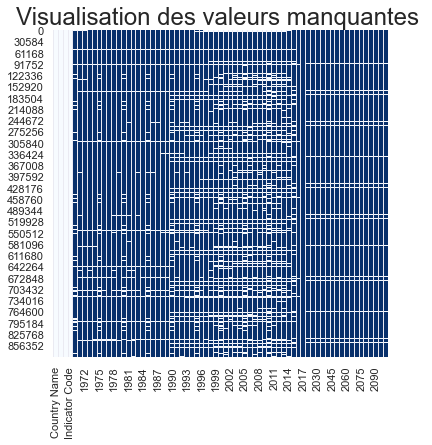

In [57]:
viz_na(data)

 Il y a des années qui contiennent plus de donnees (1990 à 2015) par contre en 2017 il y a très peu de données. Il faut faire une analyse plus détaillée de cette section

In [58]:
data.describe(include='all')

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
count,886930,886930,886930,886930,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,8.912200e+04,3.877700e+04,3.751100e+04,3.846000e+04,3.860600e+04,9.029600e+04,3.937200e+04,3.864100e+04,3.855200e+04,3.754000e+04,1.244050e+05,7.443700e+04,7.554300e+04,7.579300e+04,7.746200e+04,1.313610e+05,7.680700e+04,7.345300e+04,8.491400e+04,1.188390e+05,1.766760e+05,1.235090e+05,1.242050e+05,1.303630e+05,1.288140e+05,1.841080e+05,1.403120e+05,1.372720e+05,1.343870e+05,1.421080e+05,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05,1.646000e+04,143.000000,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04
unique,242,242,3665,3665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,United Arab Emirates,PAN,"Teachers in secondary education, female (number)",UIS.ROFST.H.1.URB.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3665,3665,242,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,3.283898e+09,7.664969e+09,7.913722e+09,7.856908e+09,8.118002e+09,3.622763e+09,9.156550e+09,1.014901e+10,1.104709e+10,1.195436e+10,9.084424e+09,1.571674e+10,1.604668e+10,1.643532e+10,1.684022e+10,1.052543e+10,1.874630e+10,2.027385e+10,1.794678e+10,1.331558e+10,9.423384e+09,1.384867e+10,1.428299e+10,1.449393e+10,1.589729e+10,1.188637e+10,1.684674e+10,1.872300e+10,2.029794e+10,1.894907e+10,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10,1.934411e+11,2.160839,5.780697e+02,6.054774e+02,6.315916e+02,6.556516e+02,6.751516e+02,6.911287e+02,7.040640e+02,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02
std,NaN,NaN,NaN,NaN,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,1.780774e+11,2.744142e+11,2.790549e+11,2.823809e+11,2.940635e+11,2.002929e+11,3.264675e+11,3.535351e+11,3.804257e+11,4.014873e+11,3.665667e+11,4.881357e+11,5.012055e+11,5.121962e+11,5.292982e+11,4.285218e+11,5.812586e+11,6.142357e+11,5.859148e+11,5.153472e+11,4.442374e+11,5.449242e+11,5.622886e+11,5.803607e+11,6.278337e+11,5.576181e+11,6.851484e+11,7.465688e+11,7.944132e+11,7.623650e+11,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11,2.839188e+12,0.810584,1.475072e+04,1.577305e+04,1.678556e+04,1.778666e+04,1.874408e+04,1.965409e+04,2.052941e+04,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04
min,NaN,NaN,NaN,NaN,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,

In [59]:
partie_na=detail(data).head(3)

In [60]:
partie_na

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Type,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null,0,0,0,0,814642,851393,851311,851385,851200,799624,849447,849356,849354,850121,797808,848153,849419,848470,848324,796634,847558,848289,848378,849390,762525,812493,811387,811137,809468,755569,810123,813477,802016,768091,710254,763421,762725,756567,758116,702822,746618,749658,752543,744822,644488,740918,739666,749421,773141,755872,870470,886787,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494
count,886930,886930,886930,886930,72288.0,35537.0,35619.0,35545.0,35730.0,87306.0,37483.0,37574.0,37576.0,36809.0,89122.0,38777.0,37511.0,38460.0,38606.0,90296.0,39372.0,38641.0,38552.0,37540.0,124405.0,74437.0,75543.0,75793.0,77462.0,131361.0,76807.0,73453.0,84914.0,118839.0,176676.0,123509.0,124205.0,130363.0,128814.0,184108.0,140312.0,137272.0,134387.0,142108.0,242442.0,146012.0,147264.0,137509.0,113789.0,131058.0,16460.0,143.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0


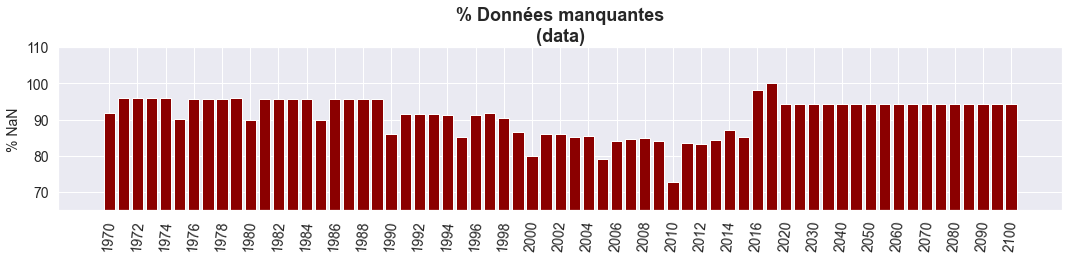

In [61]:
partie_na.reset_index()
fig = plt.figure(figsize = (18,3))

annee = partie_na.columns[4:]   # 1ere colonne prise en compte = 1970 
x=annee
y1=partie_na[annee].loc["null"]*100/(partie_na[annee].loc["null"]+partie_na[annee].loc["count"]) # % de valeurs nulles

plt.bar(height=y1, x=annee,color="darkred")
plt.xlabel("", fontsize = 14)
plt.ylabel("% NaN", fontsize = 14)
plt.xticks(annee[::2], rotation=85 , fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(round(min(y1)*0.9), round(max(y1)*1.1)) 
plt.title("% Données manquantes\n(data)", fontsize = 18, fontweight = 'bold')
plt.show()


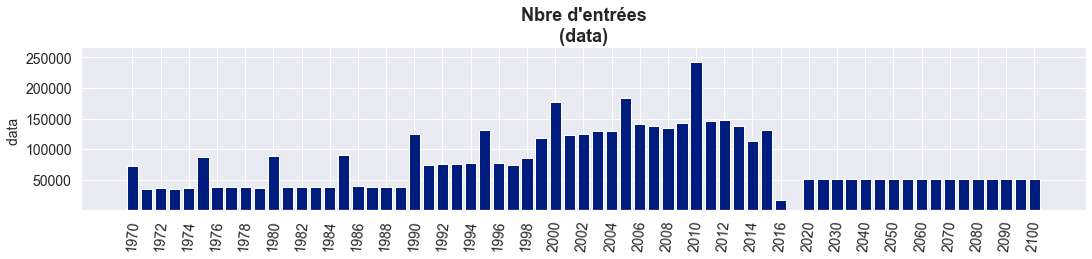

In [62]:
fig = plt.figure(figsize = (18,3))

y2=partie_na[annee].loc["count"] # nombre de valeurs

plt.bar(height=partie_na[annee].loc["count"], x=annee)
plt.xlabel("", fontsize = 14)
plt.ylabel("data ", fontsize = 14)
plt.xticks(annee[::2], rotation=85 , fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(round(min(y2)*0.9), round(max(y2)*1.1)) 
plt.title("Nbre d'entrées\n(data)", fontsize = 18, fontweight = 'bold')
plt.show()

Constatations :

il y a des pics dans les quantités de données tout les 5 ans jusqu'en 2010\
la quantité de données augmente à partie de 1990\
l'augmentation la plus marquée commence en 2000 et atteint son maximum en 2010\
2016 : très pêu de données (année de la collecte des data ?)\
2017 à 2019  : pas de données\
ensuite de 2020 à 2100 par intervalle de 5 ans , il y a peu de données\
On peut regarder plus en détail la partie 2000 à 2020

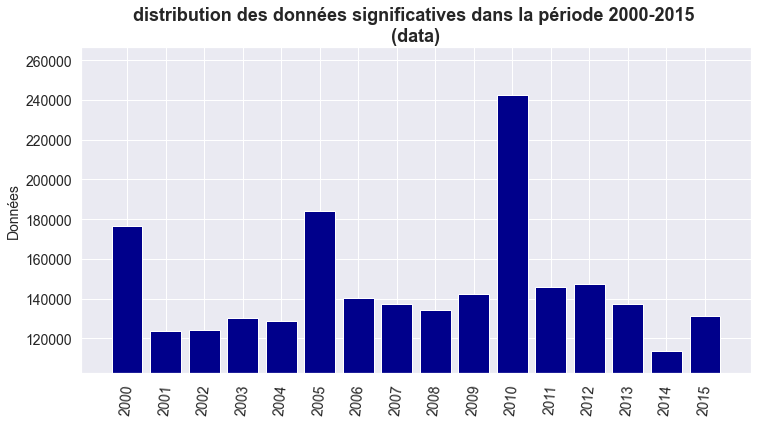

In [63]:
fig = plt.figure(figsize = (12,6))

annee = detail(data).columns[34:50]   # colonnes prises en compte de 2000 à 2015 
x=annee
y=detail(data)[annee].loc["count"] # donnees non null

plt.bar(height=y, x=annee,color="darkblue")
plt.xlabel("", fontsize = 14)
plt.ylabel("Données", fontsize = 14)
plt.xticks(annee[::1], rotation=85 , fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(round(min(y)*0.9), round(max(y)*1.1)) 
plt.title("distribution des données significatives dans la période 2000-2015 \n(data)", fontsize = 18, fontweight = 'bold')
plt.show()

In [64]:
print("Valeurs statistiques sur la quantité de données pour la période 2000-2015")
print('---------------------------------------------------------------------------')
print(f"moyenne :",round(detail(data)[annee].loc["count"].mean()))
print(f"écart type :",round(detail(data)[annee].loc["count"].std()))
print(f"médiane :",round(detail(data)[annee].loc["count"].median()))
print(f"valeur maximale :" ,round(detail(data)[annee].loc["count"].max()))
print(f"valeur minimale :" , round(detail(data)[annee].loc["count"].min()))

Valeurs statistiques sur la quantité de données pour la période 2000-2015
---------------------------------------------------------------------------
moyenne : 146239
écart type : 31419
médiane : 137390
valeur maximale : 242442
valeur minimale : 113789


In [65]:
### creer décennie et supprimer année
(data)['1970s']=(data)[[str(year) for year in range(1970,1979,1)]].mean(1)
(data)['1980s']=(data)[[str(year) for year in range(1980,1989,1)]].mean(1)
(data)['1990s']=(data)[[str(year) for year in range(1990,1999,1)]].mean(1)
(data)['2000s']=(data)[[str(year) for year in range(2000,2009,1)]].mean(1)
(data)['2010s']=(data)[[str(year) for year in range(2010,2017,1)]].mean(1)
(data)['2020s']=(data)[[str(year) for year in range(2020,2025,5)]].mean(1)
(data)['2030s']=(data)[[str(year) for year in range(2030,2035,5)]].mean(1)
(data)['2040s']=(data)[[str(year) for year in range(2040,2049,5)]].mean(1)
(data)['2050s']=(data)[[str(year) for year in range(2050,2059,5)]].mean(1)
(data)['2060s']=(data)[[str(year) for year in range(2060,2069,5)]].mean(1)
(data)['2070s']=(data)[[str(year) for year in range(2070,2079,5)]].mean(1)
(data)['2080s']=(data)[[str(year) for year in range(2080,2089,5)]].mean(1)
(data)['2090s']=(data)[[str(year) for year in range(2090,2099,5)]].mean(1)
(data)['2100s']=(data)[[str(year) for year in range(2100,2100,5)]].mean(1)
#(data).drop((data).iloc[:,4:-14:],axis=1,inplace=True)
#data.columns

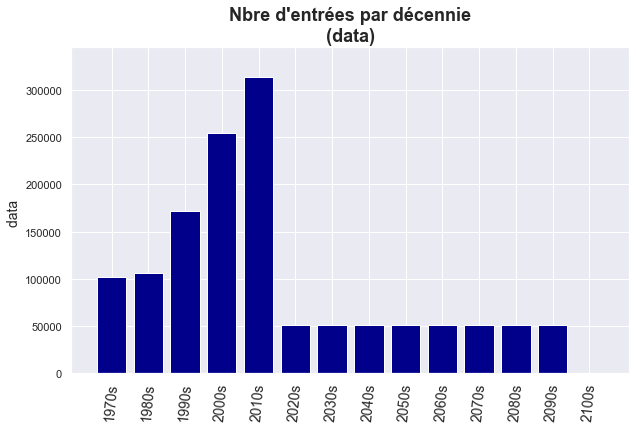

In [66]:
fig = plt.figure(figsize = (10,6))

annee = detail(data).columns[69:]   # 1ere colonne prise en compte = 1970s 
x=annee

y2=detail(data)[annee].loc["count", ] # nombre de valeurs
plt.bar(height=detail(data)[annee].loc["count"], x=annee,color='Darkblue')
plt.xlabel("", fontsize = 14)
plt.ylabel("data ", fontsize = 14)
plt.xticks(annee[::1], rotation=85 , fontsize = 14)
plt.ylim(round(min(y2)*0.9), round(max(y2)*1.1)) 
plt.title("Nbre d'entrées par décennie\n(data)", fontsize = 18, fontweight = 'bold')
plt.show()

l'analyse des données par décennie confirme ce que nous avions constaté dans la répartition par année . Les décennies 2000s et 2010s contiennent le plus de données. On peut évaluer le pourcentage.

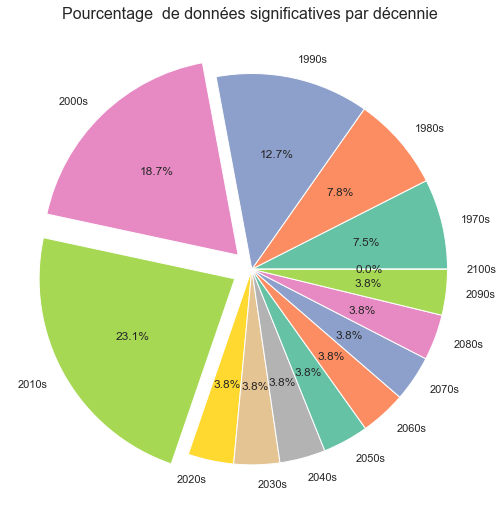

In [67]:
# diagramme circulaire avec pourcentage 2 décimales
plt.figure(figsize=(9,9) )
explode = (0, 0, 0, 0.1,0.1,0,0,0,0,0,0,0,0,0)
colors=sns.color_palette("Set2")
plt.title('Pourcentage  de données significatives par décennie ',font='Arial',fontsize=16)
plt.pie(x=detail(data)[annee].loc["count", ], labels= detail(data).columns[69:],colors = colors,explode=explode, autopct = '%1.1f%%',startangle=0);
plt.show()

les décades 2000s et 2010s contiennent plus de 40% de l'information

##  Résumé de l'analyse du jeu de données EdStatsData.csv
Le jeu de donnees contient des informations sur :

                        242 countryCode et CountryName dont
                             211 pour des pays repris dans le dataset CountrySerie.
                             31 concernent des regroupements écomnomiques,géographiques et des pays ou partie de pays.
                        3665 IndicatorCode et IndicatorName
                        65 colonnes contenant des données par année sur une période de 1970 à 2100

la colonne Unnamed :69 qui ne contenait que des nan a été supprimée.

Le jeu de données restant contient :
  
            taille totale du jeu de donnees : 61198170
            nombre de lignes : 886930                             nombre de colonnes : 69
            nombre de valeurs manquantes : 52568249           % de valeurs manquantes : 85.9
            
 Il y a des années qui sont peu ou pas du tout documentées .Les années les plus riches en données sont les années entre 2000 et 2015          

# 4. Importation et traitement du fichier EdStatsFootNote.csv 

In [68]:
foot_note = pd.read_csv('C:\\Users\\serge\\OneDrive\\Documents\\Documents\\DATA SCIENTIST\\P2\EdStatsFootNote.csv ')

In [69]:
foot_note.head()  # afficher les 5eres lignes

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [70]:
foot_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [71]:
# la colonne  Unnamed :4 ne contient que des nan et peut être supprimée
foot_note.dropna(axis='columns',how='all',inplace=True)   #supprime les colonnes avec 0 non-null

In [72]:
# Doublons dans le dataset 
print(f'Nombre de doublons dans le dataset :', foot_note.duplicated().sum())

Nombre de doublons dans le dataset : 0


In [73]:
# nombre de variable et type

type_var(foot_note)

Variables
---------


,Nombre,%
object,4,100.0


In [74]:
foot_note['SeriesCode'].nunique()

1558

In [75]:
# vérification affichage des années
foot_note['Year'].unique()

array(['YR2001', 'YR2005', 'YR2000', 'YR2004', 'YR2006', 'YR2003',
       'YR1999', 'YR2008', 'YR2002', 'YR2007', 'YR2017', 'YR2010',
       'YR2009', 'YR2011', 'YR2012', 'YR2015', 'YR2014', 'YR1970',
       'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976',
       'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981', 'YR1982',
       'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987', 'YR1988',
       'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994',
       'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR2013', 'YR2016',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050', 'yr2012'], dtype=object)

In [76]:
# la colonne Year est du type object et comporte le suffixe YR ou yr qu'on peut enlever.
foot_note['Year']=foot_note['Year'].replace("YR","",regex=True)  # suppression des valeurs="YR" dans le champs Year
foot_note['Year']=foot_note['Year'].replace("yr","",regex=True)  # suppression des valeurs="yr" dans le champs Year

In [77]:
# vérification affichage des années
foot_note['Year'].unique()

array(['2001', '2005', '2000', '2004', '2006', '2003', '1999', '2008',
       '2002', '2007', '2017', '2010', '2009', '2011', '2012', '2015',
       '2014', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '2013', '2016',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050'],
      dtype=object)

In [78]:
foot_note['Year'] = foot_note['Year'].astype('int64')# changer le type de Year en int64

In [79]:
foot_note.nunique()

CountryCode     239
SeriesCode     1558
Year             55
DESCRIPTION    9102
dtype: int64

In [80]:
cont(foot_note)

taille totale du jeu de donnees : 2574552

nombre de lignes : 643638                             nombre de colonnes : 4

nombre de valeurs manquantes : 0           % de valeurs manquantes : 0.0


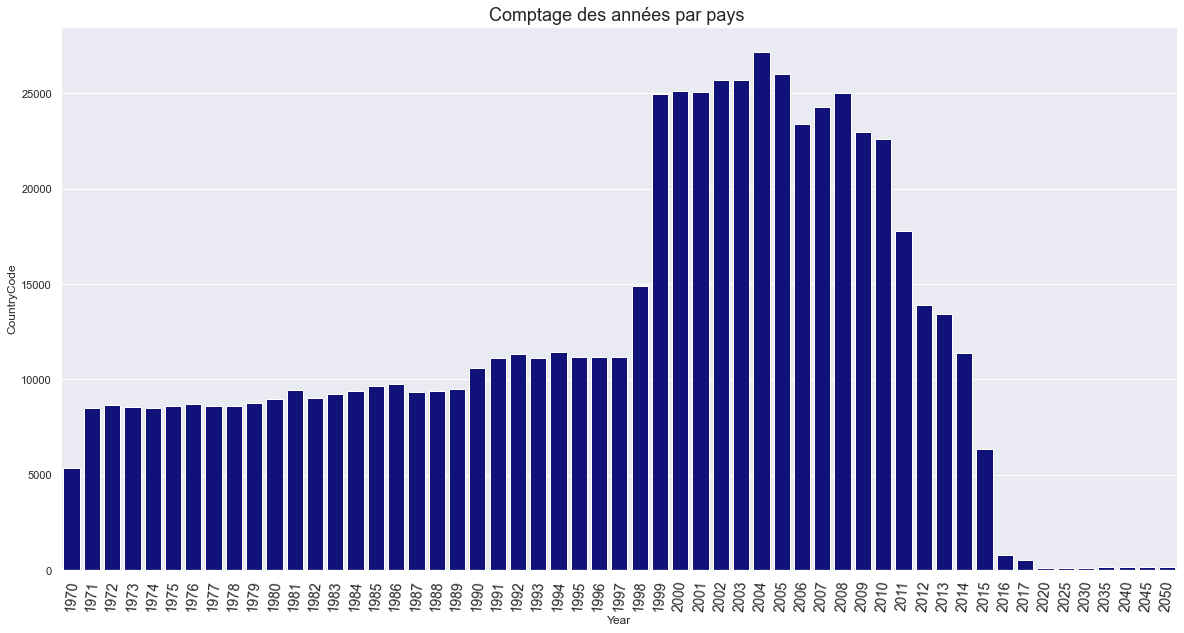

In [81]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('Comptage des années par pays ',size=18)
graph=sns.barplot(data=foot_note.groupby('Year').count().reset_index(), x='Year' ,y ='CountryCode',color="Darkblue")
graph.set_xticklabels(labels=foot_note.groupby('Year').count().reset_index()['Year'],fontsize=14, rotation=85 )
plt.show()

On peut grouper les années par décennies.

In [82]:
foot_note["tranche"] = foot_note["Year"]
bin_labels=labels=['1970s', '1980s', '1990s',"2000s",'2010s','2020s','2030s','2040s','2050s']
foot_note["tranche"] = pd.cut(x=foot_note["tranche"], bins=[1969,1979,1989,1999,2009,2019,2029,2039,2049,2100],labels=bin_labels)

<function matplotlib.pyplot.show(close=None, block=None)>

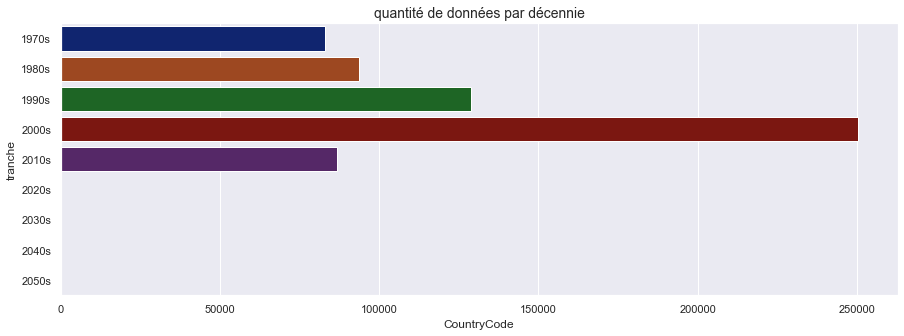

In [83]:
plt.figure(figsize=(15,5))
plt.title('quantité de données par décennie',size=14)
graphic=sns.barplot(data=foot_note.groupby('tranche').count().reset_index(),y='tranche' ,x ='CountryCode')
plt.show

On confirme que la décennie des années 2000s contient la plus grande quantité de données.

On peut regarder quel est le code pays le plus représenté dans le set de données.

In [84]:
Country_top=foot_note.groupby('CountryCode')['tranche'].count().reset_index().sort_values(by='tranche',ascending=False)
#Country_top


<function matplotlib.pyplot.show(close=None, block=None)>

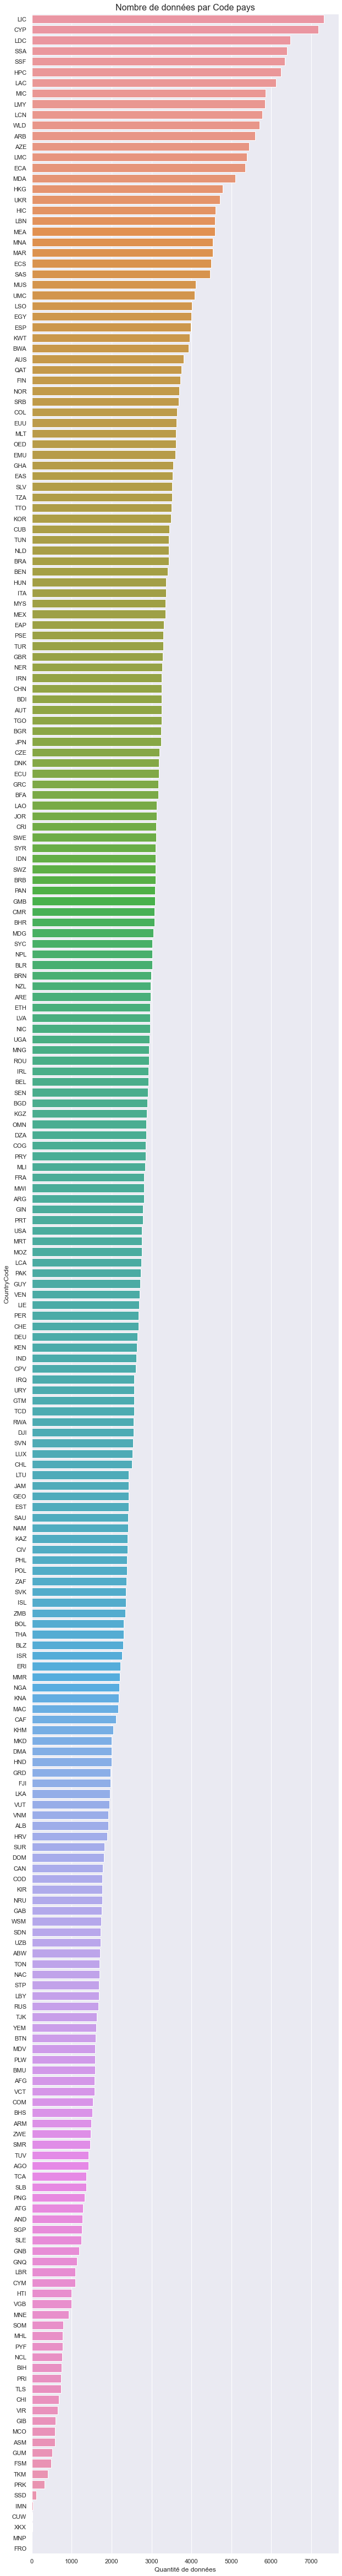

In [85]:
Country_top=foot_note.groupby('CountryCode')['tranche'].count().reset_index().sort_values(by='tranche',ascending=False)
plt.figure(figsize=(10,85))
plt.title('Nombre de données par Code pays',size=16)
sns.barplot(data=Country_top,y='CountryCode' ,x ='tranche')
plt.xlabel("Quantité de données")
plt.show

Intéressons-nous au CountryCode de ce fichier et voyons ceux qu on ne retrouve pas dans CountrySerie

In [86]:
country_out=Country_top.loc[~Country_top['CountryCode'].isin(country_serie['CountryCode'].unique())]
country_out.count()['CountryCode']

29

Mettons un nom  sur ces 29 CountryCode

In [87]:
data.loc[data['Country Code'].isin(country_out['CountryCode'].unique())]['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'British Virgin Islands',
       'Curacao', 'Nauru', 'South Sudan'], dtype=object)

  Parmis ces 29 CountryCode on retrouve :
  
                   . des noms de régions ou de regroupement de pays ( Europe & Central Asia, Middle East & North Africa...)
                   . des noms de classement selon l'importance des rentrées ( Low & middle income, Lower middle income..)
                   . des pays devenus autonomes  ( Curaçao,Nauru,...)
    

239 CountryCode dont 29 sont des régions...
Il y a donc 239 - 29 = 210 CountryCode de pays.
Hors dans le dataset CountrySeries , il y a 211 CountryCode recensés. 
Quel est le pays absent de FootNote ? 

In [88]:
### recherchons le CountryCode présent dans CountrySeries mais absent dans Country_top
country_serie.loc[~country_serie['CountryCode'].isin(Country_top['CountryCode'].unique())]['CountryCode'].unique()

array(['GRL'], dtype=object)

In [89]:
# afficher le nom correspondant au CountryCode
data.loc[data['Country Code']=='GRL',]['Country Name'].unique()  

array(['Greenland'], dtype=object)

##  Résumé de l'analyse du jeu de données EdStatsFootNote.csv

Le jeu de donnees contient des enregistrements sur :

                        239 countryCode avec 210 pour des pays repris dans le dataset CountrySerie.
                                             29 concernent des regroupements écomnomiques,géographiques ou autres .
                        1558 SeriesCode 
                        1 colonne Year contenant une année sur une période de 1970 à 2050
                        1 colonne Description comportant 9102 DESCRIPTION
                        
la colonne Unnamed :69 qui ne contenait que des nan a été supprimée.

Le jeu de données restant contient :
  
            taille totale du jeu de donnees : 2574552
            nombre de lignes : 643638                             nombre de colonnes : 4
            nombre de valeurs manquantes : 0                      % de valeurs manquantes : 0.0
            
        

In [90]:
foot_note.sample()

,CountryCode,SeriesCode,Year,DESCRIPTION,tranche
20523,ARM,UIS.TEP.6,2014,Country Data,2010s


### 5. Importation et traitement du fichier EdStatsSeries.csv 

In [91]:
serie = pd.read_csv('C:\\Users\\serge\\OneDrive\\Documents\\Documents\\DATA SCIENTIST\\P2\EdStatsSeries.csv ')

In [92]:
serie.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
serie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [94]:
serie.dropna(axis='columns',how='all',inplace=True)   #supprime les colonnes avec 0 non-null


In [95]:
serie.nunique()

Series Code                            3665
Topic                                    37
Indicator Name                         3665
Short definition                       1169
Long definition                        2060
Periodicity                               1
Base Period                               4
Other notes                              14
Aggregation method                        3
Limitations and exceptions                9
General comments                          8
Source                                   31
Statistical concept and methodology       2
Development relevance                     1
Related source links                      1
dtype: int64

In [96]:
#on vérifie la présence de doublon dans la dataframe
print(f'Nombre de doublons dans le dataset :', serie.duplicated().sum())

Nombre de doublons dans le dataset : 0


In [97]:
# nombre et type de variables
type_var(serie)

Variables
---------


,Nombre,%
object,15,100.0


###  Code, nom et définition des indicateurs

In [98]:
## il s'agit du code de l'indicateur
serie['Series Code'].unique()

array(['BAR.NOED.1519.FE.ZS', 'BAR.NOED.1519.ZS', 'BAR.NOED.15UP.FE.ZS',
       ..., 'UIS.XUNIT.USCONST.56.FSGOV', 'XGDP.23.FSGOV.FDINSTADM.FFD',
       'XGDP.56.FSGOV.FDINSTADM.FFD'], dtype=object)

In [99]:
## il s'agit du nom de l'indicateur
serie['Indicator Name'].unique()

array(['Barro-Lee: Percentage of female population age 15-19 with no education',
       'Barro-Lee: Percentage of population age 15-19 with no education',
       'Barro-Lee: Percentage of female population age 15+ with no education',
       ..., 'Government expenditure per tertiary student (constant US$)',
       'Government expenditure in secondary institutions education as % of GDP (%)',
       'Government expenditure in tertiary institutions as % of GDP (%)'],
      dtype=object)

In [100]:
## définition courte de l'indicateur
serie['Short definition'].unique()

array(['Percentage of female population age 15-19 with no education',
       'Percentage of population age 15-19 with no education',
       'Percentage of female population age 15+ with no education', ...,
       'Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in nominal purchasing power parity (PPP) dollars. Divide total government expenditure (in PPP$) for a given level of education (ex. primary, secondary) by total enrolment in that same level. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/',
       'Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in purchasing power parity (PPP) dollars at constant prices. The constant prices base year is normally three years before the year of the data release. Divide total government expenditure (in constant PPP$) f

In [101]:
# definition longue de l'indicateur
serie['Long definition'].unique()

array(['Percentage of female population age 15-19 with no education',
       'Percentage of population age 15-19 with no education',
       'Percentage of female population age 15+ with no education', ...,
       'Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in nominal US$ at market exchange rates. Divide total government expenditure (in US$) for a given level of education (ex. primary, secondary) by total enrolment in that same level. This indicator is useful to compare average spending on one student between levels of education, over time, or between countries. Constant US$ allow comparing absolute values using a common currency, however nominal values do not take into account the effect of inflation. This indicator should not be considered a unit cost, since it only includes what the government spends, and not total spending per student (including household contributions). Since it is a simple di

In [102]:
## il s'agit de thématiques qui regroupe les indicateurs
serie['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

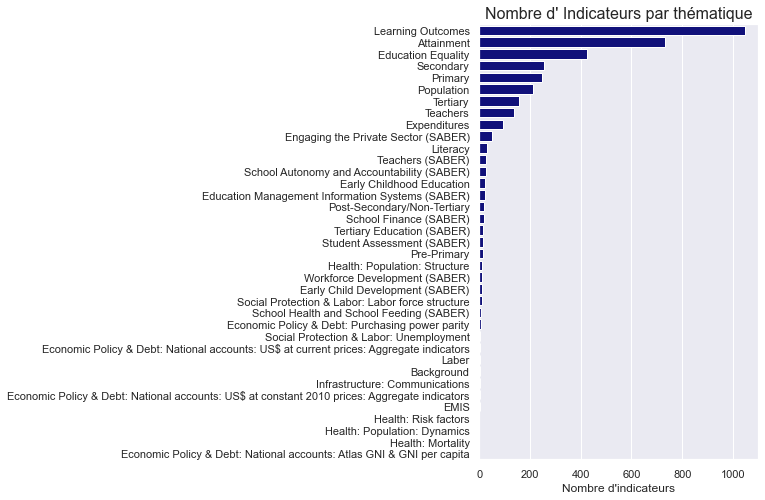

In [103]:
Topic=serie.groupby('Topic').count()[['Series Code']].reset_index().sort_values(by='Series Code', ascending=False)
plt.figure(figsize=(5,8))
sns.barplot(data=Topic,y='Topic' ,x ='Series Code',color='darkblue')
plt.title("Nombre d' Indicateurs par thématique",fontsize=16)
plt.xlabel("Nombre d'indicateurs")
plt.ylabel('')
plt.show;

### Affichage du top 10 

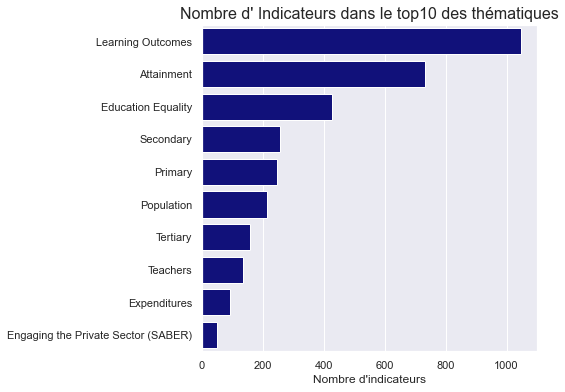

In [104]:
Topic=serie.groupby('Topic').count()[['Series Code']].reset_index().sort_values(by='Series Code', ascending=False).head(10)
plt.figure(figsize=(6,6))
sns.barplot(data=Topic,y='Topic' ,x ='Series Code',color='darkblue')
plt.title("Nombre d' Indicateurs dans le top10 des thématiques",fontsize=16)
plt.xlabel("Nombre d'indicateurs")
plt.ylabel('')
plt.show;

In [105]:
cont(serie)

taille totale du jeu de donnees : 54975

nombre de lignes : 3665                             nombre de colonnes : 15

nombre de valeurs manquantes : 33213           % de valeurs manquantes : 60.41


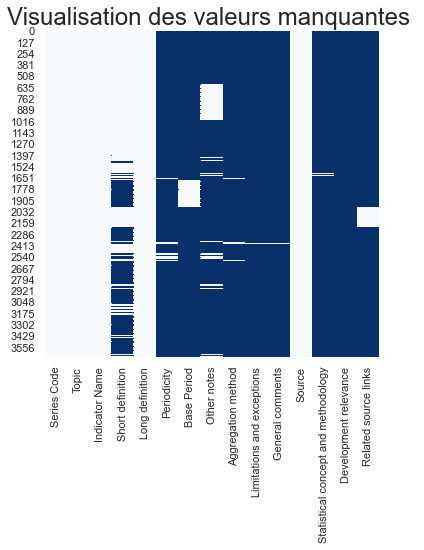

In [106]:
viz_na(serie)

In [107]:
serie.nunique()

Series Code                            3665
Topic                                    37
Indicator Name                         3665
Short definition                       1169
Long definition                        2060
Periodicity                               1
Base Period                               4
Other notes                              14
Aggregation method                        3
Limitations and exceptions                9
General comments                          8
Source                                   31
Statistical concept and methodology       2
Development relevance                     1
Related source links                      1
dtype: int64

### Résumé de l'analyse du jeu de données EdStatsSerie.csv

Le jeu de donnees contient des informations sur :

    3665 indicateurs (Series code et Indicator Name ) répartis en
    37 Topic (catégories portant sur la santé , l' éducation, l' économie ,les communications, la protection sociale... \
    Certain codes ont une définition (Short Definition et long definition)
    Les autres colonnes traitent principalement de la collecte de données source,fréquence... sont peu intéressantes.
    
 6 colonnes avec uniquement des nan ont été supprimées :                
 5 Unit of measure 
 11  Notes from original source
 17  Other web links                      
 18  Related indicators                   
 19  License Type                         
 20  Unnamed: 20                          
Le jeu de données restant contient :

           taille totale du jeu de donnees : 54975
           nombre de lignes : 3665                             nombre de colonnes : 15
           nombre de valeurs manquantes : 33213           % de valeurs manquantes : 60.41
        


## 1.Fichier EdStatsSerie

**je conserve uniquement les 3 eres **\
**Création d' un fichier de travail serie_wk** \




In [108]:
serie_wk=serie.iloc[:,[0,1,2]]

In [109]:
serie_wk.head(5)

,Series Code,Topic,Indicator Name
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15+ with no education
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ with no education
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 20-24 with no education


In [110]:
serie_wk.nunique()

Series Code       3665
Topic               37
Indicator Name    3665
dtype: int64

## 2.Fichier EdStatsFootNote

**je ne vais pas utiliser ce jeu de données pour l'analyse

In [111]:
#foot_note_wk=foot_note.iloc[:,:4]
#periode=list(range(2000,2016,1))
## sélection des années 2000 à 2015
#foot_note_wk=foot_note_wk.loc[foot_note_wk['Year'].isin(periode)]

In [112]:
#foot_note_wk.info()

##  3.Fichier EdStatsCountry

 **on complete les valeurs manquantes du champs Region en affectant la valeur "Autres"
 **on complete les valeurs manquantes du champs Income Group en affectant la valeur "non défini"
 **on complete les valeurs manquantes du champs Currency unit en affectant la valeur "Non applicable"

**Creation d'un fichier de travail country_wk

**On conserve 7 colonnes de travail dans country_wk**

remarque: dans le dataset 'Country',les colonnes '2-alpha code' et ' wb-2 code 'ne sont pas identiques. De plus les autres jeux de données ont un code pays a 3 lettres. Je ne retiens pas ces 2 champs pour la suite de l'étude.

In [113]:
## difference entre les 2 codes
country.loc[~country['2-alpha code'].isin(country['WB-2 code'])][['Country Code','Short Name','2-alpha code','WB-2 code']]

,Country Code,Short Name,2-alpha code,WB-2 code
40,COD,Dem. Rep. Congo,CD,ZR
181,PSE,West Bank and Gaza,PS,GZ
197,SRB,Serbia,RS,YF
216,TLS,Timor-Leste,TL,TP
237,YEM,Yemen,YE,RY


In [114]:
## Nettoyage du fichier country : je conserve 7 colonnes
country_wk=country.iloc[:, [0,1,2,3,5,7,8]]
# remplacer les valeurs manquantes des colonnes Region ,Currency Unit et Income Group

In [115]:
country_wk['Region'].fillna("Autres",inplace=True)                #affecte la  valeur "Autres" 

C:\Users\serge\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [116]:
country_wk['Income Group'].fillna('Non défini',inplace=True)     #affecte la valeur 'Non défini"

In [117]:
country_wk['Currency Unit'].fillna('Non applicable',inplace=True)     #affecte la valeur 'Non applicable"

##  4.Fichier EdStatsCountrySerie

**je ne vais pas utiliser ce fichier pour l'analyse

In [118]:
#country_serie_wk=country_serie.iloc[:,:2]

In [119]:
#country_serie_wk.sample()

   ##  5. Fichier EdStatsData
 
   **Dans le fichier EdStatsData.csv, la période la plus documentée de 2000 à 2015 sera analysée.**
   
   **Création d'un fichier de travail data_wk**

In [120]:
# sélection de 2000 à 2015
data_wk=data.iloc[:, np.r_[0:4,34:50]]

In [121]:
data_wk.sample(1)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
259925,"Congo, Rep.",COG,Wittgenstein Projection: Mean years of schooling. Age 40-64. Female,PRJ.MYS.4064.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.5,NaN,NaN,NaN,NaN,6.3


### 1.suppression des lignes pour lesquelles toutes les colonnes 'année' ont une valeur nan

In [122]:
col = data_wk.columns[5:25] 
# nombre de lignes qui seront supprimées
data_wk['Country Name'].count()-data_wk.dropna(subset=col,how='all')['Country Name'].count()

540225

In [123]:
# suupression des lignes pour lesquelles toutes les annnées sont nan
data_wk=data_wk.dropna(subset=col,how='all')
data_wk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346705 entries, 4 to 886929
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    346705 non-null  object 
 1   Country Code    346705 non-null  object 
 2   Indicator Name  346705 non-null  object 
 3   Indicator Code  346705 non-null  object 
 4   2000            175268 non-null  float64
 5   2001            123509 non-null  float64
 6   2002            124205 non-null  float64
 7   2003            130363 non-null  float64
 8   2004            128814 non-null  float64
 9   2005            184108 non-null  float64
 10  2006            140312 non-null  float64
 11  2007            137272 non-null  float64
 12  2008            134387 non-null  float64
 13  2009            142108 non-null  float64
 14  2010            242442 non-null  float64
 15  2011            146012 non-null  float64
 16  2012            147264 non-null  float64
 17  2013      

In [124]:
data_wk.loc[~data_wk['Indicator Code'].isin(serie_wk['Series Code'])]['Indicator Code'].unique()

array(['UIS.LPP.AG15T99', 'UIS.LP.AG15T99', 'UIS.LP.AG15T99.F',
       'UIS.LR.AG15T99.GPI', 'UIS.TRANRA.23.GPV.GPI', 'UIS.GER.1T6.F',
       'UIS.GER.1T6.GPI', 'UIS.GER.1T6.M', 'SE.SEC.ENRR.UP.FE',
       'UIS.AIR.1.GLAST.GPI', 'UIS.SLE.1T6.GPI', 'UIS.SR.1.GLAST.GPI',
       'UIS.OE.56.40510', 'UIS.LP.AG15T24', 'UIS.LP.AG15T24.F',
       'UIS.LP.AG15T24.M', 'UIS.LP.AG65', 'UIS.LP.AG65.M',
       'UIS.LR.AG65.F', 'UIS.LR.AG65.M', 'UIS.E.2.PU.F', 'UIS.E.4.PU',
       'UIS.E.4.PU.F', 'UIS.E.1.PU', 'UIS.E.1.PU.F', 'UIS.E.23.PU',
       'UIS.E.23.PU.F', 'UIS.E.3.PU.F', 'UIS.NIR.1.AGP1',
       'UIS.NIR.1.AGP1.F', 'UIS.NIR.1.AGP1.M', 'UIS.NIR.1.AGM1',
       'UIS.NIR.1.AGM1.F', 'UIS.NIR.1.AGM1.M', 'UIS.CEAGE.1',
       'UIS.THAGE.4.A.GPV', 'UIS.THAGE.0', 'UIS.THAGE.3.A.GPV',
       'UIS.FOSEP.56.FUK.F', 'SE.SEC.DURS.LO', 'UIS.THDUR.4.A.GPV',
       'UIS.THDUR.0', 'UIS.XSPENDP.56.FDPUB.FNCAP',
       'UIS.XSPENDP.56.FDPUB.FNNONS', 'UIS.LPP.AG65', 'UIS.E.0.PU.F',
       'UIS.XGDP.FSGOV.FDINST

In [125]:
serie_wk.loc[serie_wk['Series Code'].str.contains('UIS.AFR.TATTRR.3')]['Series Code']

2705    UIS.AFR.TATTRR.3.Pu.F
2706    UIS.AFR.TATTRR.3.Pu.M
2707    UIS.AFR.TATTRR.3.Pu.T
Name: Series Code, dtype: object

**Il y a un problème de majuscule/minuscule. Je passe la colonne en Majuscule pour uniformiser l'écriture dans les différents jeux

In [126]:
data_wk['Indicator Code']=data_wk['Indicator Code'].str.upper()

In [127]:
print("Nombre de codes différents après fonction UPPER():",data_wk.loc[~data_wk['Indicator Code'].isin(serie_wk['Series Code'])]['Indicator Code'].unique())

Nombre de codes différents après fonction UPPER(): ['UIS.LPP.AG15T99' 'UIS.LP.AG15T99' 'UIS.LP.AG15T99.F'
 'UIS.LR.AG15T99.GPI' 'UIS.TRANRA.23.GPV.GPI' 'UIS.GER.1T6.F'
 'UIS.GER.1T6.GPI' 'UIS.GER.1T6.M' 'SE.SEC.ENRR.UP.FE'
 'UIS.AIR.1.GLAST.GPI' 'UIS.SLE.1T6.GPI' 'UIS.SR.1.GLAST.GPI'
 'UIS.OE.56.40510' 'UIS.LP.AG15T24' 'UIS.LP.AG15T24.F' 'UIS.LP.AG15T24.M'
 'UIS.LP.AG65' 'UIS.LP.AG65.M' 'UIS.LR.AG65.F' 'UIS.LR.AG65.M'
 'UIS.E.2.PU.F' 'UIS.E.4.PU' 'UIS.E.4.PU.F' 'UIS.E.1.PU' 'UIS.E.1.PU.F'
 'UIS.E.23.PU' 'UIS.E.23.PU.F' 'UIS.E.3.PU.F' 'UIS.NIR.1.AGP1'
 'UIS.NIR.1.AGP1.F' 'UIS.NIR.1.AGP1.M' 'UIS.NIR.1.AGM1' 'UIS.NIR.1.AGM1.F'
 'UIS.NIR.1.AGM1.M' 'UIS.CEAGE.1' 'UIS.THAGE.4.A.GPV' 'UIS.THAGE.0'
 'UIS.THAGE.3.A.GPV' 'UIS.FOSEP.56.FUK.F' 'SE.SEC.DURS.LO'
 'UIS.THDUR.4.A.GPV' 'UIS.THDUR.0' 'UIS.XSPENDP.56.FDPUB.FNCAP'
 'UIS.XSPENDP.56.FDPUB.FNNONS' 'UIS.LPP.AG65' 'UIS.E.0.PU.F'
 'UIS.XGDP.FSGOV.FDINSTADM.FFD' 'UIS.XGDP.1.FSGOV.FDINSTADM.FFD'
 'UIS.E.1.GUK' 'UIS.E.1.GUK.F' 'UIS.XPUBP.4' 'UIS.X

### 2. quels sont les indicateurs les plus représentés dans le fichier 

### Comment se répartissent les données manquantes par année et par indicateur pour tous les pays ?

In [128]:
## nombre d'années dans data_wk
col = data_wk.columns[5:25] 
# nombre de pays dans data_wk
nb_pays=data_wk['Country Name'].nunique()
#le nombre d'indicateurs par année
df=data_wk.groupby('Indicator Code')[col].count()

In [129]:
df=df.reset_index()
# ajout une colonne 'TOT' pour faire la somme 
df['TOT']=df[col].sum(axis=1)
df

,Indicator Code,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,TOT
0,BAR.NOED.1519.FE.ZS,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,288
1,BAR.NOED.1519.ZS,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,288
2,BAR.NOED.15UP.FE.ZS,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,288
3,BAR.NOED.15UP.ZS,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,288
4,BAR.NOED.2024.FE.ZS,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3630,UIS.XUNIT.USCONST.3.FSGOV,46,54,48,55,52,52,57,60,62,70,74,61,47,21,0,759
3631,UIS.XUNIT.USCONST.4.FSGOV,33,33,28,29,31,32,35,31,33,37,35,33,19,10,0,419
3632,UIS.XUNIT.USCONST.56.FSGOV,65,72,60,80,72,71,70,75,86,94,87,74,55,21,0,982
3633,XGDP.23.FSGOV.FDINSTADM.FFD,57,69,62,76,80,70,79,89,92,102,100,81,74,39,1,1071


In [130]:
# ajout une colonne '%' qui représente le pourcentage de remplissage pour chaque indicateur pour tous les pays et toutes les années
#
df['%']=round((df['TOT'])*100/(nb_pays*len(col)))
df

,Indicator Code,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,TOT,%
0,BAR.NOED.1519.FE.ZS,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,288,8.0
1,BAR.NOED.1519.ZS,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,288,8.0
2,BAR.NOED.15UP.FE.ZS,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,288,8.0
3,BAR.NOED.15UP.ZS,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,288,8.0
4,BAR.NOED.2024.FE.ZS,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,288,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3630,UIS.XUNIT.USCONST.3.FSGOV,46,54,48,55,52,52,57,60,62,70,74,61,47,21,0,759,21.0
3631,UIS.XUNIT.USCONST.4.FSGOV,33,33,28,29,31,32,35,31,33,37,35,33,19,10,0,419,12.0
3632,UIS.XUNIT.USCONST.56.FSGOV,65,72,60,80,72,71,70,75,86,94,87,74,55,21,0,982,27.0
3633,XGDP.23.FSGOV.FDINSTADM.FFD,57,69,62,76,80,70,79,89,92,102,100,81,74,39,1,1071,30.0


In [131]:
# affichage des statistiques descriptives des colonnes TOT et %
df[['TOT','%']].describe().T

,count,mean,std,min,25%,50%,75%,max
TOT,3635.0,595.089959,860.858988,1.0,28.0,288.0,748.0,3582.0
%,3635.0,16.316094,23.703299,0.0,1.0,8.0,21.0,99.0


In [132]:
quantile_88=df[['%']].quantile(0.88).to_string()
print('Qantile 88% :', quantile_88)
quantile_90=df[['%']].quantile(.9).to_string()
print('Qantile 90% :', quantile_90)

Qantile 88% : %    53.92
Qantile 90% : %    61.6


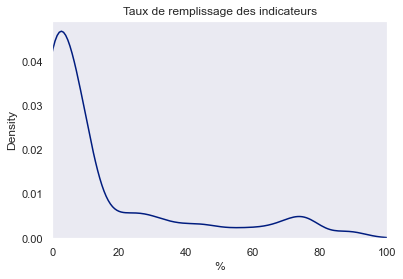

Indicateurs restants : 450


In [133]:
# Représentation graphique du taux de remplissage des indicateurs pour toutes les années pour trouver le seuil
sns.kdeplot(df['%'])
plt.grid(False)
plt.xlim([0,100])
plt.title('Taux de remplissage des indicateurs')
plt.show()
df_fin=df[df['%']>50]
print(f'Indicateurs restants : {df_fin.shape[0]}')
plt.show()


In [134]:
# 450/3665*100=12,..  soit 12 % avec quantile ( 100-12 )= quantile 88 avec taux de remplissage = 53 %

25% des indicateurs ont un taux de remplissage de 20 %\
10% des Indicateurs ont un taux de remplissage de 61 %

 Je fixe seuil de taux de remplissage des indicateurs fixés à 50 %
--> 12 % des indicateurs ont un taux de remplissage de 50% . Cela représente 450 indicateurs à analyser

In [135]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 611 to 3522
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Code  450 non-null    object 
 1   2001            450 non-null    int64  
 2   2002            450 non-null    int64  
 3   2003            450 non-null    int64  
 4   2004            450 non-null    int64  
 5   2005            450 non-null    int64  
 6   2006            450 non-null    int64  
 7   2007            450 non-null    int64  
 8   2008            450 non-null    int64  
 9   2009            450 non-null    int64  
 10  2010            450 non-null    int64  
 11  2011            450 non-null    int64  
 12  2012            450 non-null    int64  
 13  2013            450 non-null    int64  
 14  2014            450 non-null    int64  
 15  2015            450 non-null    int64  
 16  TOT             450 non-null    int64  
 17  %               450 non-null    

###  3. Quels sont les indicateurs les plus pertinents pour notre analyse ?

FACTEURS ECONOMIQUES :le pib du pays,le revenu moyen de la population\
FACTEURS SOCIAUX :la stabilité politique, le taux de scolarisation,la tranche de population entre 15 -25 ans\
FACTEURS ENERGETIQUES l'accès à l'électricité ,déployement de l'internet, réseaux téléphonie fixe et mobile  ...\
Facteurs STRUCTURELS : accès aux infrastructures (développement réseau routier,ferroviaire et aérien, aux universités , bibliothèques , centres culturels....

En regardant sur le site de la banque lmondiale de données j'ai noté plusieurs indicateurs:\
   -Inscriptions à l’école, enseignement supérieur (% brut) : SE.TER.ENRR\
    -Éducation secondaire, élèves :SE.SEC.ENRL\
    -Ratio de jeunes filles/garçons alphabétisés (% des 15 à 24 ans):SE.ADT.1524.LT.FM.ZS\
    -Utilisateurs d Internet (% de la population):IT.NET.USER.ZS\
    -Serveurs Internet sécurisés (pour 1 million de personnes):IT.NET.USER.ZS\
    -Accès à l’électricité (% de la population): EG.ELC.ACCS.ZS\
    -Utilisation d’énergie (kg d’équivalent pétrole par habitant):EG.USE.PCAP.KG.OE\
    -Population âgée de 20 à 24 ans, hommes (% de la population masculine):SP.POP.2024.MA.5Y\
    -

Ceci m'a permis de trouver des racines qui seront utilisées pour les recherches\
SE.SEC : enseignement dans le secondaire (lycée)\
SE.TER : enseignement supérieur\
1519 : population âgée de 15 à 19 ans
1524 : population âgée de 15 à 24 ans\
2024 : population âgée de 20 à 24 ans\
SP.POP: Population\
IT.NET: Infrastructure technique\
NY : National Accounts, produits intérieurs et nationaux\
EG : Energie\



In [136]:

### liste des keys
list_key=['15','19','20','24','SEC','TER','IT','NY','EG']
## initilise la Dataframe 
df_tot=pd.DataFrame(columns=['Indicator Code','2001','2002','2003',"2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015",'TOT','%'])



In [137]:
for i in list_key:
   
    result=df_fin.loc[df_fin['Indicator Code'].str.contains(i)]['Indicator Code'].tolist()
    df_filtre=df_fin.loc[df_fin['Indicator Code'].str.contains(i)]
    df_tot=pd.concat([df_tot,  df_filtre])
    print("la recherche sur le mot clé",i," a trouvé :",len(result),"occurences")

la recherche sur le mot clé 15  a trouvé : 19 occurences
la recherche sur le mot clé 19  a trouvé : 9 occurences
la recherche sur le mot clé 20  a trouvé : 3 occurences
la recherche sur le mot clé 24  a trouvé : 6 occurences
la recherche sur le mot clé SEC  a trouvé : 43 occurences
la recherche sur le mot clé TER  a trouvé : 10 occurences
la recherche sur le mot clé IT  a trouvé : 1 occurences
la recherche sur le mot clé NY  a trouvé : 12 occurences
la recherche sur le mot clé EG  a trouvé : 0 occurences


In [138]:
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 2420 to 1657
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Code  103 non-null    object 
 1   2001            103 non-null    object 
 2   2002            103 non-null    object 
 3   2003            103 non-null    object 
 4   2004            103 non-null    object 
 5   2005            103 non-null    object 
 6   2006            103 non-null    object 
 7   2007            103 non-null    object 
 8   2008            103 non-null    object 
 9   2009            103 non-null    object 
 10  2010            103 non-null    object 
 11  2011            103 non-null    object 
 12  2012            103 non-null    object 
 13  2013            103 non-null    object 
 14  2014            103 non-null    object 
 15  2015            103 non-null    object 
 16  TOT             103 non-null    object 
 17  %               103 non-null   

Nous avons recherché les codes qui contiennent les mots clés définis .Je vais ajouter une colonne avec une description du code pour faciliter la compréhension


In [139]:
serie_wk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Series Code     3665 non-null   object
 1   Topic           3665 non-null   object
 2   Indicator Name  3665 non-null   object
dtypes: object(3)
memory usage: 86.0+ KB


In [140]:

df_key=df_tot.merge(serie_wk.iloc[:,[0,1,2]],left_on="Indicator Code",right_on="Series Code",how="left")

In [141]:
df_key.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Code  103 non-null    object 
 1   2001            103 non-null    object 
 2   2002            103 non-null    object 
 3   2003            103 non-null    object 
 4   2004            103 non-null    object 
 5   2005            103 non-null    object 
 6   2006            103 non-null    object 
 7   2007            103 non-null    object 
 8   2008            103 non-null    object 
 9   2009            103 non-null    object 
 10  2010            103 non-null    object 
 11  2011            103 non-null    object 
 12  2012            103 non-null    object 
 13  2013            103 non-null    object 
 14  2014            103 non-null    object 
 15  2015            103 non-null    object 
 16  TOT             103 non-null    object 
 17  %               103 non-null    flo

Après l'opération de fusion on constate qu'il  y a 2 cellules nan pour les Series Code et Long Definition. On va vérifier d'où cela provient.

In [142]:
df_key.loc[~df_key['Indicator Code'].isin(serie_wk.iloc[:,[0,1,2]]['Series Code'])]['Indicator Code'].unique()

array(['SE.SEC.DURS.LO', 'SE.SEC.ENRR.UP.FE'], dtype=object)

In [143]:
serie_wk.loc[serie_wk['Series Code'].str.contains('SE.SEC.DURS.LO')]['Series Code'].unique()

array(['SE.SEC.DURS.LO '], dtype=object)

Il y a un espace supplémentaire dans le texte des 2 codes repris dans le  fichier serie

In [144]:
# on remplace les valeurs  
serie_wk=serie_wk.replace(['SE.SEC.DURS.LO '],['SE.SEC.DURS.LO'])
serie_wk=serie_wk.replace(['SE.SEC.ENRR.UP.FE '],['SE.SEC.ENRR.UP.FE'])

In [145]:
### on vérifie à nouveau 
df_key.loc[~df_key['Indicator Code'].isin(serie_wk.iloc[:,[0,1,2]]['Series Code'])]['Indicator Code'].nunique()

0

In [146]:
### on refait la fusion pour remplacer le dataframe 
df_key=df_tot.merge(serie_wk.iloc[:,[0,1,2]],left_on="Indicator Code",right_on="Series Code",how="left")

In [147]:
df_key.drop('Series Code', axis=1, inplace=True) ## supprimer la colonne Series Code
df_key.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Code  103 non-null    object 
 1   2001            103 non-null    object 
 2   2002            103 non-null    object 
 3   2003            103 non-null    object 
 4   2004            103 non-null    object 
 5   2005            103 non-null    object 
 6   2006            103 non-null    object 
 7   2007            103 non-null    object 
 8   2008            103 non-null    object 
 9   2009            103 non-null    object 
 10  2010            103 non-null    object 
 11  2011            103 non-null    object 
 12  2012            103 non-null    object 
 13  2013            103 non-null    object 
 14  2014            103 non-null    object 
 15  2015            103 non-null    object 
 16  TOT             103 non-null    object 
 17  %               103 non-null    flo

## Nous avons un dataframe avec 103 codes contenant les mots clés. Il faut regarder en détail et conservé ceux qui sont le plus pertinents pour notre analyse

In [148]:
print(list_key)


['15', '19', '20', '24', 'SEC', 'TER', 'IT', 'NY', 'EG']


In [149]:
df_key.loc[df_key['Indicator Code'].str.contains('15')][['Indicator Code' , 'Indicator Name','Topic']].drop_duplicates(subset=['Indicator Code'], keep='first')

,Indicator Code,Indicator Name,Topic
0,SP.POP.1015.FE.UN,"Population, ages 10-15, female",Population
1,SP.POP.1015.MA.UN,"Population, ages 10-15, male",Population
2,SP.POP.1015.TO.UN,"Population, ages 10-15, total",Population
3,SP.POP.1115.FE.UN,"Population, ages 11-15, female",Population
4,SP.POP.1115.MA.UN,"Population, ages 11-15, male",Population
5,SP.POP.1115.TO.UN,"Population, ages 11-15, total",Population
6,SP.POP.1215.FE.UN,"Population, ages 12-15, female",Population
7,SP.POP.1215.MA.UN,"Population, ages 12-15, male",Population
8,SP.POP.1215.TO.UN,"Population, ages 12-15, total",Population
9,SP.POP.1524.FE.UN,"Population, ages 15-24, female",Population


### mot clé : 15
### Je conserve SP.POP.1524.TO.UN ---->    Population, ages 15-24, total is the total population age 15-24.	

In [150]:
### je vais mettre les indicateurs retenus dans une liste
list_indic=[]
list_indic=list_indic+['SP.POP.1524.TO.UN']

In [151]:
df_key.loc[df_key['Indicator Code'].str.contains('19')][['Indicator Code' , 'Indicator Name','Topic']].drop_duplicates(subset=['Indicator Code'], keep='first')

,Indicator Code,Indicator Name,Topic
19,SP.POP.1319.FE.UN,"Population, ages 13-19, female",Population
20,SP.POP.1319.MA.UN,"Population, ages 13-19, male",Population
21,SP.POP.1319.TO.UN,"Population, ages 13-19, total",Population
22,SP.POP.1419.FE.UN,"Population, ages 14-19, female",Population
23,SP.POP.1419.MA.UN,"Population, ages 14-19, male",Population
24,SP.POP.1419.TO.UN,"Population, ages 14-19, total",Population
25,SP.POP.AG19.FE.UN,"Age population, age 19, female, UNESCO",Population
26,SP.POP.AG19.MA.UN,"Population, age 19, male",Population
27,SP.POP.AG19.TO.UN,"Age population, age 19, total, UNESCO",Population


### mot clé : 19
### je conserve SP.POP.1419.TO.UN --> Population, ages 14-19, total is the total population age 14-19

In [152]:
list_indic=list_indic+['SP.POP.1419.TO.UN']

In [153]:
df_key.loc[df_key['Indicator Code'].str.contains('20')][['Indicator Code' ,  'Indicator Name','Topic']].drop_duplicates(subset=['Indicator Code'], keep='first')

,Indicator Code,Indicator Name,Topic
28,SP.POP.AG20.FE.UN,"Age population, age 20, female, UNESCO",Population
29,SP.POP.AG20.MA.UN,"Population, age 20, male",Population
30,SP.POP.AG20.TO.UN,"Age population, age 20, total, UNESCO",Population


###  mot clé : 20     NON RETENU



### mot clé : 24      SP.POP.1524.TO.UN	   --> idem mot clé 15 

In [154]:
df_key.loc[df_key['Indicator Code'].str.contains('SEC')][['Indicator Code' ,  'Indicator Name','Topic']].drop_duplicates(subset=['Indicator Code'], keep='first')

,Indicator Code,Indicator Name,Topic
37,SE.ENR.SECO.FM.ZS,"Gross enrolment ratio, secondary, gender parity index (GPI)",Secondary
38,SE.SEC.AGES,Official entrance age to lower secondary education (years),Secondary
39,SE.SEC.CMPT.LO.FE.ZS,"Lower secondary completion rate, female (%)",Secondary
40,SE.SEC.CMPT.LO.MA.ZS,"Lower secondary completion rate, male (%)",Secondary
41,SE.SEC.CMPT.LO.ZS,"Lower secondary completion rate, both sexes (%)",Secondary
42,SE.SEC.DURS,Theoretical duration of secondary education (years),Secondary
43,SE.SEC.DURS.LO,Theoretical duration of lower secondary education (years),Secondary
44,SE.SEC.DURS.UP,Theoretical duration of upper secondary education (years),Secondary
45,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (number)",Secondary
46,SE.SEC.ENRL.FE,"Enrolment in secondary education, female (number)",Secondary


### mot clé :  SEC
### Je conserve  SE.SEC.ENRR -->Total enrollment in secondary education, regardless of age, expressed as a percentage of the population of official secondary education age. GER can exceed 100% due to the inclusion of over-aged and under-aged students because of early or late school entrance and grade repetition.	Secondary


In [155]:
list_indic=list_indic+['SE.SEC.ENRR']

In [156]:
df_key.loc[df_key['Indicator Code'].str.contains('TER')][['Indicator Code' ,  'Indicator Name','Topic']].drop_duplicates(subset=['Indicator Code'], keep='first')

,Indicator Code,Indicator Name,Topic
80,SE.ENR.TERT.FM.ZS,"Gross enrolment ratio, tertiary, gender parity index (GPI)",Tertiary
81,SE.TER.ENRL,"Enrolment in tertiary education, all programmes, both sexes (number)",Tertiary
82,SE.TER.ENRL.FE,"Enrolment in tertiary education, all programmes, female (number)",Tertiary
83,SE.TER.ENRL.FE.ZS,Percentage of students in tertiary education who are female (%),Tertiary
84,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)",Tertiary
85,SE.TER.ENRR.FE,"Gross enrolment ratio, tertiary, female (%)",Tertiary
86,SE.TER.ENRR.MA,"Gross enrolment ratio, tertiary, male (%)",Tertiary
87,SP.TER.TOTL.FE.IN,"Population of the official age for tertiary education, female (number)",Population
88,SP.TER.TOTL.IN,"Population of the official age for tertiary education, both sexes (number)",Population
89,SP.TER.TOTL.MA.IN,"Population of the official age for tertiary education, male (number)",Population


### Mot clé : TER
### je conserve SE.TER.ENRR -->  Total enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total population of the five-year age group following on from secondary school leaving.	Tertiary
	

In [157]:
list_indic=list_indic+['SE.TER.ENRR']

### Mot clé : IT  
### je conserve  IT.NET.USER.P2 -->	Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.	

In [158]:
list_indic=list_indic+['IT.NET.USER.P2']

In [159]:
df_key.loc[df_key['Indicator Code'].str.contains('NY')][['Indicator Code' , 'Indicator Name','Topic']].drop_duplicates(subset=['Indicator Code'], keep='first')

,Indicator Code,Indicator Name,Topic
91,NY.GDP.MKTP.CD,GDP (current US$),Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators
92,NY.GDP.MKTP.KD,GDP (constant 2010 US$),Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators
93,NY.GDP.MKTP.PP.CD,"GDP, PPP (current international $)",Economic Policy & Debt: Purchasing power parity
94,NY.GDP.MKTP.PP.KD,"GDP, PPP (constant 2011 international $)",Economic Policy & Debt: Purchasing power parity
95,NY.GDP.PCAP.CD,GDP per capita (current US$),Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators
96,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators
97,NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)",Economic Policy & Debt: Purchasing power parity
98,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 international $)",Economic Policy & Debt: Purchasing power parity
99,NY.GNP.MKTP.CD,GNI (current US$),Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators
100,NY.GNP.MKTP.PP.CD,"GNI, PPP (current international $)",Economic Policy & Debt: Purchasing power parity


### Mot clé : NY
### je conserve  NY.GDP.PCAP.PP.CD-->  PIB/habitant PPP ( converted to international dollars using purchasing power parity rates)

In [160]:
list_indic=list_indic+['NY.GDP.PCAP.PP.CD']

In [161]:
df_key.loc[df_key['Indicator Code'].str.contains('EG')][['Indicator Code' , 'Indicator Name','Topic']].drop_duplicates(subset=['Indicator Code'], keep='first')

,Indicator Code,Indicator Name,Topic


### Mot clé : EG   NON RETENU

### En résumé nous avons conservé les indicateurs  repris dans la liste ci-dessous :

In [162]:
list_indic

['SP.POP.1524.TO.UN',
 'SP.POP.1419.TO.UN',
 'SE.SEC.ENRR',
 'SE.TER.ENRR',
 'IT.NET.USER.P2',
 'NY.GDP.PCAP.PP.CD']

###  La suite de l'étude  sera basée sur ces  indicateurs pour une période s'échelonnant de 2000 à 2015 

In [163]:
data_wk.sample()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
866249,Vietnam,VNM,"Gross enrolment ratio, lower secondary, gender parity index (GPI)",UIS.GER.2.GPI,0.91585,0.91996,0.93786,0.9308,0.95145,0.95791,0.96901,0.98015,0.99904,0.98991,1.04868,0.98597,0.99689,0.99921,1.00028,NaN


In [164]:
data_wk.nunique()

Country Name         242
Country Code         242
Indicator Name      3635
Indicator Code      3635
2000              114906
2001              108633
2002              108974
2003              114344
2004              113431
2005              123821
2006              124989
2007              121541
2008              119598
2009              126177
2010              135853
2011              128444
2012              130040
2013              120987
2014              100187
2015               79334
dtype: int64

In [165]:
data_indic=data_wk.loc[data_wk['Indicator Code'].isin(list_indic)]

In [166]:
data_indic['Country Name'].nunique()

235

#### Remarque
On est passé de 242 à 235 pays;ce qui signifie que 7 pays n'ont pas d'indicateur repris dans la liste des indicateurs.
Je vais afficher les pays. 

In [167]:
data_wk.loc[~data_wk['Country Code'].isin(data_indic['Country Code'])]['Country Name'].unique()

array(['American Samoa', 'Channel Islands', 'Isle of Man',
       'Northern Mariana Islands', 'Sint Maarten (Dutch part)',
       'St. Martin (French part)', 'Turks and Caicos Islands'],
      dtype=object)

#### Il n'existe pas de données sur les indicateurs choisis pour ces pays

 ##### Je vais ajouter des champs en faisant une jointure avec la dataframe Country.

In [168]:
data_indic=pd.merge(data_indic,country_wk,on='Country Code',how='left')

In [169]:
data_indic.nunique()

Country Name       235
Country Code       235
Indicator Name       6
Indicator Code       6
2000              1119
2001              1135
2002              1150
2003              1140
2004              1151
2005              1147
2006              1131
2007              1124
2008              1114
2009              1118
2010              1100
2011              1116
2012              1127
2013              1102
2014              1092
2015              1019
Short Name         234
Table Name         234
Long Name          234
Currency Unit      153
Region               8
Income Group         6
dtype: int64

In [170]:
## supprimer les colonnes Short Name , Table Name et Long Name
data_indic.drop(data_indic.columns[[20,21,22]],axis='columns', inplace=True)
data_indic.sample()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Currency Unit,Region,Income Group
808,Mongolia,MNG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,65.11853,71.667809,75.981728,82.790443,87.822189,90.290154,89.872971,NaN,NaN,97.674019,91.592552,NaN,NaN,NaN,NaN,91.462334,Mongolian tugrik,East Asia & Pacific,Lower middle income


In [171]:
### affiche colonnes , lignes et valeurs manquantes
cont(data_indic)

taille totale du jeu de donnees : 28842

nombre de lignes : 1254                             nombre de colonnes : 23

nombre de valeurs manquantes : 2061           % de valeurs manquantes : 7.15


In [172]:
### arrange les colonnes dans un ordre plus judicieux
data_indic = data_indic.iloc[:,[0,1,2,3,20,21,22,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]

In [173]:
# affichage des colonnes
data_indic.head(0)

,Country Name,Country Code,Indicator Name,Indicator Code,Currency Unit,Region,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015


In [174]:
### faire une copie de la dataframe avec pays et région
data_indic_c=data_indic.copy()

In [175]:
### en faisant un filtre sur Région on ne conserve que les "vrais pays"
data_indic=data_indic.loc[data_indic['Region']!='Autres',:]
# verifier le nombre de pays restants
data_indic['Country Name'].nunique()


208

### Traitement valeurs manquantes

#### 1 . Valeurs manquantes dans les colonnes de caractéristiques des pays

In [176]:
## on affiche le pourcentage de valeurs manquantes 
data_indic.isna().mean().round(4)*100


Country Name       0.00
Country Code       0.00
Indicator Name     0.00
Indicator Code     0.00
Currency Unit      0.17
Region             0.17
Income Group       0.17
2000              11.72
2001              10.33
2002               8.94
2003               9.90
2004               8.85
2005               9.20
2006              10.59
2007              10.68
2008              10.94
2009              10.33
2010              10.42
2011               9.29
2012              10.59
2013              12.24
2014              13.11
2015              16.23
dtype: float64

il y a quelques valeurs nan dan les colonnes Currency Unit , Region et Income group

In [177]:
# afficher nom de pays qui a des valeurs nan dans la colonne Région
data_indic.loc[data_indic['Region'].isna()]['Country Name'].unique()

array(['British Virgin Islands'], dtype=object)

Il y a un pays non documenté. Il s'agit des Iles Vierge Britanniques situées dnas la region 'Latin America & Caribbean' . La monnaie du pays est le dollar us. Il est repris comme un high Income Nous pouvons ajouter les données manquantes.

In [178]:
### ajout les données manquantes 
data_indic.loc[data_indic['Country Name']=='British Virgin Islands',['Income Group']]='High income: nonOECD'
data_indic.loc[data_indic['Country Name']=='British Virgin Islands',['Region']]='Latin America & Caribbean'
data_indic.loc[data_indic['Country Name']=='British Virgin Islands',['Currency Unit']]='U.S. dollar'

In [179]:
## on vérifie le pourcentage de valeurs manquantes sur les colonnes qui caractérisent le pays
data_indic.iloc[:,:7].isna().mean().round(4)*100

Country Name      0.0
Country Code      0.0
Indicator Name    0.0
Indicator Code    0.0
Currency Unit     0.0
Region            0.0
Income Group      0.0
dtype: float64

### 2. Valeurs manquantes dans les colonnes années

In [180]:
data_indic.iloc[:,7:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 100 to 1253
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    1017 non-null   float64
 1   2001    1033 non-null   float64
 2   2002    1049 non-null   float64
 3   2003    1038 non-null   float64
 4   2004    1050 non-null   float64
 5   2005    1046 non-null   float64
 6   2006    1030 non-null   float64
 7   2007    1029 non-null   float64
 8   2008    1026 non-null   float64
 9   2009    1033 non-null   float64
 10  2010    1032 non-null   float64
 11  2011    1045 non-null   float64
 12  2012    1030 non-null   float64
 13  2013    1011 non-null   float64
 14  2014    1001 non-null   float64
 15  2015    965 non-null    float64
dtypes: float64(16)
memory usage: 153.0 KB


### On peut remplacer les valeurs manquantes dans les colonnes ANNEE  par la moyenne de la ligne

In [181]:
data_indic=data_indic.reset_index(drop=True)

In [182]:
## sélection des colonnes d'années dans data_indic
col=data_indic.columns[7:]
# sélection des annéees 2010 à 2015
last=data_indic.columns[-6:]
# nombre de pays dans data_indic
nb_pays=data_indic['Country Name'].nunique()

In [183]:
data_indic.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,Currency Unit,Region,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,Afghan afghani,South Asia,Low income,NaN,NaN,875.51761,922.829449,916.334475,1011.595524,1065.619665,1210.479265,1247.066144,1482.098837,1581.600836,1660.739856,1873.153946,1877.411953,1875.447407,1864.973641


In [184]:
for i in data_indic.axes[0]:
    data_indic.loc[data_indic.index[i]]=data_indic.loc[data_indic.index[i]].fillna(data_indic.loc[data_indic.index[i],col].mean())

## PIB par habitant par pays

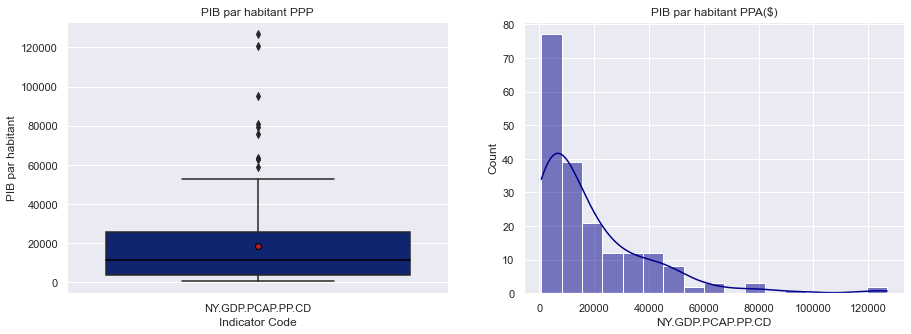

In [185]:
### pib par habitant
code="NY.GDP.PCAP.PP.CD"
#le nombre d'indicateurs par pays et par année
df_pib=data_indic.loc[data_indic['Indicator Code']==code,:].groupby(['Country Name','Indicator Code'])[col].mean().round()
df_pib['MOY']=round(df_pib[col].mean(axis=1),0) ### moyenne par ligne 
df_pib['STDEV']=round(df_pib[col].std(axis=1),0) ### STDEV normalisée par line 
df_pib['MAX']=round(df_pib[col].max(axis=1))
df_pib['MIN']=round(df_pib[col].min(axis=1,skipna = False))
df_pib['2010-2015']=round(df_pib[last].mean(axis=1),0) ### moyenne par ligne période 2010-2015
df_pib=df_pib.sort_values(by="2010-2015", ascending=False).reset_index()
#df_pib=df.sort_values(by="2010-2015", ascending=False).reset_index()[['Country Name','MOY',"MIN","MAX",'STDEV','2010-2015']]
df_pib.reset_index(drop =False,inplace=True)
df_pib=df_pib.rename(columns = {'index': 'score_pib'})
### le score final = 1-score normalisé  -->  (X-Xmin)/(Xmax-Xmin)
df_pib['score_pib']=1-((df_pib['score_pib']-df_pib['score_pib'].min())/(df_pib['score_pib'].max()-df_pib['score_pib'].min()))


#Graphique statistiques sur l'  indicateur ""NY.GDP.PCAP.PP.CD""

plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
# Propriétés graphiques     
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
sns.boxplot( x=df_pib['Indicator Code'], y=df_pib['2010-2015'], showfliers=True, medianprops=medianprops, showmeans=True, meanprops=meanprops)
plt.title("PIB par habitant PPP")
plt.ylabel('PIB par habitant')

plt.subplot(1,2,2)
sns.histplot(df_pib['2010-2015'], kde = True, color='Darkblue')
plt.title("PIB par habitant PPA($)")
plt.xlabel("NY.GDP.PCAP.PP.CD")
plt.show()

In [186]:
df_pib.describe()

,score_pib,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,MOY,STDEV,MAX,MIN,2010-2015
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.00000,192.000000
mean,0.500000,11616.635417,11992.328125,12358.598958,12854.614583,13753.572917,14482.161458,15635.854167,16601.010417,17226.166667,16736.598958,17322.750000,18048.984375,18562.291667,19182.208333,19650.458333,19917.197917,15996.291667,3118.838542,20736.161458,11318.40625,18780.656250
std,0.290941,14739.125352,15072.212193,15407.833857,15911.063469,16991.504955,17516.988026,18792.823464,19582.294785,19904.375177,18920.322414,19683.133243,20799.738786,21186.814386,21834.653346,22033.345124,21648.259590,18484.903270,3895.695091,23492.798200,14204.77541,21135.952883
min,0.000000,419.000000,409.000000,415.000000,433.000000,460.000000,488.000000,513.000000,542.000000,568.000000,570.000000,597.000000,630.000000,665.000000,619.000000,634.000000,668.000000,561.000000,0.000000,801.000000,409.00000,694.000000
25%,0.250000,2157.000000,2156.000000,2189.250000,2297.000000,2450.750000,2609.000000,2834.250000,3020.250000,3181.250000,3166.250000,3286.000000,3482.000000,3663.250000,3813.500000,3874.250000,3900.750000,3025.500000,599.750000,4071.500000,2018.50000,3680.250000
50%,0.500000,5864.500000,6103.500000,6381.000000,6608.500000,7201.500000,7788.000000,8415.000000,9108.000000,9753.500000,9852.000000,9873.500000,10416.500000,11199.000000,11742.000000,12279.500000,12654.500000,8880.500000,1916.500000,12654.500000,5856.00000,11604.000000
75%,0.750000,14716.250000,14810.500000,16195.000000,17160.250000,18435.250000,20265.500000,21369.500000,23228.750000,23467.000000,22414.000000,23076.750000,24191.250000,25292.250000,26252.750000,26968.500000,27658.750000,21128.250000,4525.500000,29044.250000,14179.75000,25489.500000
max,1.000000,85861.000000,87599.000000,91084.000000,90349.000000,100427.000000,97767.000000,108831.000000,111960.000000,115012.000000,113313.000000,122609.000000,129350.000000,127610.000000,140037.000000,137737.000000,127764.000000,110235.000000,37059.000000,140037.000000,85861.00000,126926.000000


In [187]:
df_pib.iloc[:,1:22].head(5)      

,Country Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,MOY,STDEV,MAX
0,Qatar,NY.GDP.PCAP.PP.CD,85861.0,87599.0,91084.0,90349.0,100427.0,97767.0,108831.0,111960.0,115012.0,113313.0,122609.0,129350.0,127610.0,126913.0,127313.0,127764.0,110235.0,16031.0,129350.0
1,"Macao SAR, China",NY.GDP.PCAP.PP.CD,33469.0,34408.0,37145.0,41267.0,52457.0,57163.0,65307.0,75132.0,77585.0,77553.0,96198.0,116752.0,126863.0,140037.0,137737.0,107246.0,79770.0,37059.0,140037.0
2,Luxembourg,NY.GDP.PCAP.PP.CD,55306.0,56023.0,58772.0,60036.0,64097.0,68220.0,77996.0,83949.0,86694.0,82362.0,85779.0,92005.0,91622.0,95591.0,101877.0,103733.0,79004.0,16487.0,103733.0
3,Brunei Darussalam,NY.GDP.PCAP.PP.CD,65035.0,66961.0,69247.0,71337.0,72412.0,73873.0,78398.0,79617.0,78683.0,76964.0,78923.0,82435.0,83504.0,81827.0,80152.0,79593.0,76185.0,5677.0,83504.0
4,Singapore,NY.GDP.PCAP.PP.CD,40978.0,40408.0,42368.0,45800.0,50911.0,55173.0,59999.0,64466.0,63438.0,61647.0,70647.0,75013.0,77429.0,81288.0,84593.0,86306.0,62529.0,15682.0,86306.0


In [188]:
df_pib.head(5)

,score_pib,Country Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,MOY,STDEV,MAX,MIN,2010-2015
0,1.000000,Qatar,NY.GDP.PCAP.PP.CD,85861.0,87599.0,91084.0,90349.0,100427.0,97767.0,108831.0,111960.0,115012.0,113313.0,122609.0,129350.0,127610.0,126913.0,127313.0,127764.0,110235.0,16031.0,129350.0,85861.0,126926.0
1,0.994764,"Macao SAR, China",NY.GDP.PCAP.PP.CD,33469.0,34408.0,37145.0,41267.0,52457.0,57163.0,65307.0,75132.0,77585.0,77553.0,96198.0,116752.0,126863.0,140037.0,137737.0,107246.0,79770.0,37059.0,140037.0,33469.0,120806.0
2,0.989529,Luxembourg,NY.GDP.PCAP.PP.CD,55306.0,56023.0,58772.0,60036.0,64097.0,68220.0,77996.0,83949.0,86694.0,82362.0,85779.0,92005.0,91622.0,95591.0,101877.0,103733.0,79004.0,16487.0,103733.0,55306.0,95101.0
3,0.984293,Brunei Darussalam,NY.GDP.PCAP.PP.CD,65035.0,66961.0,69247.0,71337.0,72412.0,73873.0,78398.0,79617.0,78683.0,76964.0,78923.0,82435.0,83504.0,81827.0,80152.0,79593.0,76185.0,5677.0,83504.0,65035.0,81072.0
4,0.979058,Singapore,NY.GDP.PCAP.PP.CD,40978.0,40408.0,42368.0,45800.0,50911.0,55173.0,59999.0,64466.0,63438.0,61647.0,70647.0,75013.0,77429.0,81288.0,84593.0,86306.0,62529.0,15682.0,86306.0,40408.0,79213.0


## Taux accès à l' internet au cours des 3 derniers mois

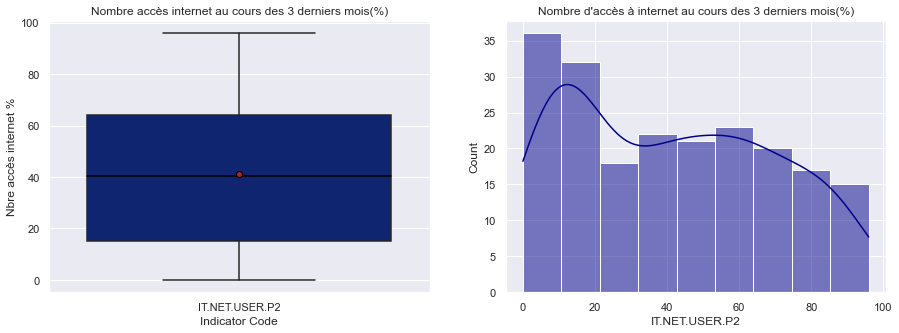

In [189]:
### Taux accès à'internet au cours des 3 derniers mois
code="IT.NET.USER.P2"
#le nombre d'indicateurs par pays et par année
df_it=data_indic.loc[data_indic['Indicator Code']==code,:].groupby(['Country Name','Indicator Code'])[col].mean().round()
df_it['MOY']=round(df_it[col].mean(axis=1),0) ### moyenne par ligne 
df_it['STDEV']=round(df_it[col].std(axis=1),0) ### STDEV normalisée par line 
df_it['MAX']=round(df_it[col].max(axis=1))
df_it['MIN']=round(df_it[col].min(axis=1,skipna = False))
df_it['2010-2015']=round(df_it[last].mean(axis=1),0) ### moyenne par ligne période 2010-2015
df_it=df_it.sort_values(by="2010-2015", ascending=False).reset_index()
#df_pib=df.sort_values(by="2010-2015", ascending=False).reset_index()[['Country Name','MOY',"MIN","MAX",'STDEV','2010-2015']]
df_it.reset_index(drop =False,inplace=True)
df_it=df_it.rename(columns = {'index': 'score_it'})
### le score final = 1-score normalisé  -->  (X-Xmin)/(Xmax-Xmin)
df_it['score_it']=1-((df_it['score_it']-df_it['score_it'].min())/(df_it['score_it'].max()-df_it['score_it'].min()))

#Graphique statistiques sur l'  indicateur "NY.GDP.PCAP.CD"

plt.figure(figsize = (15, 5))


plt.subplot(1,2,1)
# Propriétés graphiques     
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
sns.boxplot( x=df_it['Indicator Code'], y=df_it['2010-2015'], showfliers=True, medianprops=medianprops, showmeans=True, meanprops=meanprops)
plt.title("Nombre accès internet au cours des 3 derniers mois(%)")
plt.ylabel('Nbre accès internet %')

plt.subplot(1,2,2)
sns.histplot(df_it['2010-2015'], kde = True, color='Darkblue')
plt.title("Nombre d'accès à internet au cours des 3 derniers mois(%)")
plt.xlabel("IT.NET.USER.P2")
plt.show()


In [190]:
df_it.head(5)

,score_it,Country Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,MOY,STDEV,MAX,MIN,2010-2015
0,1.000000,Iceland,IT.NET.USER.P2,44.0,49.0,79.0,83.0,84.0,87.0,90.0,91.0,91.0,93.0,93.0,95.0,96.0,97.0,98.0,98.0,86.0,16.0,98.0,44.0,96.0
1,0.995074,Norway,IT.NET.USER.P2,52.0,64.0,73.0,78.0,78.0,82.0,83.0,87.0,91.0,92.0,93.0,93.0,95.0,95.0,96.0,97.0,84.0,13.0,97.0,52.0,95.0
2,0.990148,Denmark,IT.NET.USER.P2,39.0,43.0,64.0,76.0,81.0,83.0,87.0,85.0,85.0,87.0,89.0,90.0,92.0,95.0,96.0,96.0,80.0,17.0,96.0,39.0,93.0
3,0.985222,Luxembourg,IT.NET.USER.P2,23.0,36.0,40.0,55.0,66.0,70.0,73.0,79.0,82.0,87.0,91.0,90.0,92.0,94.0,95.0,97.0,73.0,23.0,97.0,23.0,93.0
4,0.980296,Sweden,IT.NET.USER.P2,46.0,52.0,71.0,79.0,84.0,85.0,88.0,82.0,90.0,91.0,90.0,93.0,93.0,95.0,93.0,91.0,83.0,15.0,95.0,46.0,92.0


In [191]:
df_it.describe()

,score_it,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,MOY,STDEV,MAX,MIN,2010-2015
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.00000,204.000000,204.000000,204.000000
mean,0.500000,9.240196,11.676471,14.514706,17.102941,19.147059,20.705882,23.004902,25.460784,28.171569,30.833333,33.955882,36.759804,39.686275,42.568627,45.509804,48.426471,27.931373,13.04902,48.627451,8.799020,41.147059
std,0.290807,14.020961,16.427276,19.201416,20.797977,22.075284,22.794904,23.899728,25.200740,26.163280,26.828256,27.332166,27.837604,28.489556,28.955549,28.871294,28.589148,23.139440,7.51403,28.716354,13.378308,28.110758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.750000,1.000000,2.000000,2.000000,3.000000,4.000000,4.000000,6.000000,7.000000,8.000000,10.000000,12.000000,15.000000,18.000000,22.000000,7.000000,6.00000,22.000000,0.000000,15.000000
50%,0.500000,3.000000,3.500000,5.000000,7.000000,9.000000,11.000000,14.000000,16.500000,21.500000,25.500000,30.000000,35.000000,37.500000,42.500000,46.000000,50.000000,24.000000,13.00000,50.000000,2.000000,40.500000
75%,0.750000,10.000000,16.250000,21.000000,26.000000,30.000000,33.000000,36.500000,41.000000,45.250000,51.000000,54.000000,58.000000,62.000000,66.000000,70.000000,73.000000,43.250000,18.25000,73.000000,10.000000,64.000000
max,1.000000,63.000000,64.000000,79.000000,83.000000,84.000000,87.000000,90.000000,91.000000,91.000000,93.000000,93.000000,95.000000,96.000000,97.000000,98.000000,98.000000,86.000000,31.00000,98.000000,52.000000,96.000000


## Taux d' inscription dans l'enseignement secondaire et privé

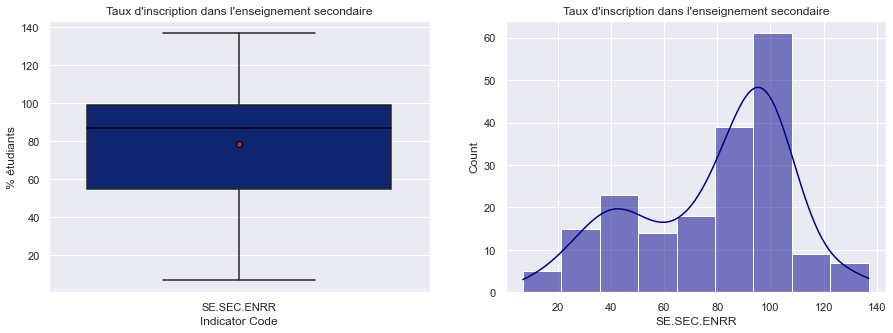

In [192]:
### 
code="SE.SEC.ENRR"
#le nombre d'indicateurs par pays et par année
df_sec=data_indic.loc[data_indic['Indicator Code']==code,:].groupby(['Country Name','Indicator Code'])[col].sum().round()
df_sec['MOY']=round(df_sec[col].mean(axis=1),0) ### moyenne par ligne 
df_sec['STDEV']=round(df_sec[col].std(axis=1),0) ### STDEV normalisée par line 
df_sec['MAX']=round(df_sec[col].max(axis=1))
df_sec['MIN']=round(df_sec[col].min(axis=1,skipna = False))
df_sec['2010-2015']=round(df_sec[last].mean(axis=1),0) ### moyenne par ligne période 2010-2015
df_sec=df_sec.sort_values(by="2010-2015", ascending=False).reset_index()
df_sec.reset_index(drop =False,inplace=True)
df_sec=df_sec.rename(columns = {'index': 'score_sec'})
### le score final = 1-score normalisé  -->  (X-Xmin)/(Xmax-Xmin)
df_sec['score_sec']=1-((df_sec['score_sec']-df_sec['score_sec'].min())/(df_sec['score_sec'].max()-df_sec['score_sec'].min()))


#Graphique statistiques sur l'  indicateur "SE.SEC.ENRR"

plt.figure(figsize = (15, 5))


plt.subplot(1,2,1)
# Propriétés graphiques     
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
sns.boxplot( x=df_sec['Indicator Code'], y=df_sec['2010-2015'], showfliers=True, medianprops=medianprops, showmeans=True, meanprops=meanprops)
plt.title("Taux d'inscription dans l'enseignement secondaire")
plt.ylabel("% étudiants")

plt.subplot(1,2,2)
sns.histplot(df_sec['2010-2015'], kde = True, color='Darkblue')
plt.title("Taux d'inscription dans l'enseignement secondaire")
plt.xlabel("SE.SEC.ENRR")
plt.show()


In [193]:
df_sec.head(5)

,score_sec,Country Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,MOY,STDEV,MAX,MIN,2010-2015
0,1.000000,Australia,SE.SEC.ENRR,163.0,155.0,154.0,156.0,150.0,148.0,127.0,126.0,128.0,130.0,132.0,134.0,137.0,138.0,138.0,141.0,141.0,12.0,163.0,126.0,137.0
1,0.994737,Belgium,SE.SEC.ENRR,145.0,154.0,156.0,159.0,108.0,108.0,109.0,108.0,106.0,106.0,106.0,106.0,106.0,163.0,165.0,167.0,130.0,27.0,167.0,106.0,136.0
2,0.989474,Netherlands,SE.SEC.ENRR,124.0,125.0,122.0,122.0,119.0,119.0,119.0,121.0,122.0,122.0,123.0,129.0,130.0,132.0,132.0,135.0,125.0,5.0,135.0,119.0,130.0
3,0.984211,Spain,SE.SEC.ENRR,110.0,112.0,112.0,112.0,114.0,118.0,118.0,118.0,118.0,118.0,124.0,129.0,131.0,131.0,130.0,130.0,120.0,8.0,131.0,110.0,129.0
4,0.978947,Finland,SE.SEC.ENRR,125.0,127.0,129.0,132.0,111.0,112.0,112.0,110.0,109.0,107.0,107.0,107.0,107.0,143.0,145.0,149.0,121.0,15.0,149.0,107.0,126.0


In [194]:
df_sec.describe()

,score_sec,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,MOY,STDEV,MAX,MIN,2010-2015
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,0.500000,70.418848,71.240838,72.434555,73.712042,73.261780,73.544503,74.204188,74.816754,75.371728,75.926702,76.759162,77.445026,77.858639,79.664921,80.167539,80.125654,75.445026,5.554974,85.136126,66.460733,78.664921
std,0.290953,31.971409,32.347856,31.755060,31.863621,30.248176,30.015730,29.292988,29.005679,28.641579,28.425061,28.082296,27.548347,27.754865,29.756782,30.007774,29.803478,29.200863,4.200985,30.078534,30.085270,28.442977
min,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,0.000000,7.000000,6.000000,7.000000
25%,0.250000,42.000000,41.000000,43.000000,42.500000,47.000000,46.000000,47.500000,48.500000,48.500000,51.000000,53.000000,54.000000,56.000000,56.500000,56.500000,57.500000,49.000000,3.000000,60.500000,38.000000,55.000000
50%,0.500000,78.000000,79.000000,81.000000,83.000000,83.000000,83.000000,83.000000,84.000000,85.000000,85.000000,86.000000,87.000000,86.000000,87.000000,86.000000,86.000000,84.000000,5.000000,93.000000,75.000000,87.000000
75%,0.750000,94.500000,95.500000,96.000000,97.000000,96.000000,97.000000,97.500000,97.000000,97.000000,98.000000,98.000000,97.000000,98.000000,100.000000,100.500000,100.000000,98.000000,8.000000,106.000000,90.500000,99.000000
max,1.000000,163.000000,155.000000,156.000000,159.000000,150.000000,148.000000,127.000000,126.000000,128.000000,130.000000,132.000000,134.000000,137.000000,163.000000,165.000000,167.000000,141.000000,27.000000,167.000000,126.000000,137.000000


##Taux d'inscription aux études superieures

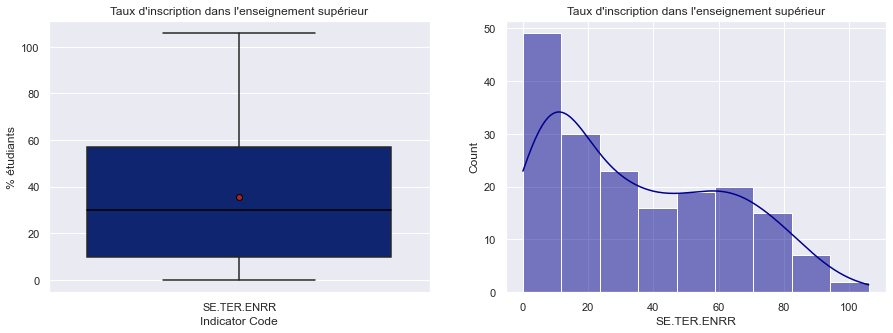

In [195]:
### Taux d'inscriptions dans l'enseignement supérieur
code="SE.TER.ENRR"
#le nombre d'indicateurs par pays et par année
df_ter=data_indic.loc[data_indic['Indicator Code']==code,:].groupby(['Country Name','Indicator Code'])[col].sum().round()
df_ter['MOY']=round(df_ter[col].mean(axis=1),0) ### moyenne par ligne 
df_ter['STDEV']=round(df_ter[col].std(axis=1),0) ### STDEV normalisée par line 
df_ter['MAX']=round(df_ter[col].max(axis=1))
df_ter['MIN']=round(df_ter[col].min(axis=1,skipna = False))
df_ter['2010-2015']=round(df_ter[last].mean(axis=1),0) ### moyenne par ligne période 2010-2015
df_ter=df_ter.sort_values(by="2010-2015", ascending=False).reset_index()
df_ter.reset_index(drop =False,inplace=True)
df_ter=df_ter.rename(columns = {'index': 'score_ter'})
### le score final = 1-score normalisé  -->  (X-Xmin)/(Xmax-Xmin)
df_ter['score_ter']=1-((df_ter['score_ter']-df_ter['score_ter'].min())/(df_ter['score_ter'].max()-df_ter['score_ter'].min()))

#Graphique statistiques sur l'  indicateur "SE.TER.ENRR"

plt.figure(figsize = (15, 5))


plt.subplot(1,2,1)
# Propriétés graphiques     
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
sns.boxplot( x=df_ter['Indicator Code'], y=df_ter['2010-2015'], showfliers=True, medianprops=medianprops, showmeans=True, meanprops=meanprops)
plt.title("Taux d'inscription dans l'enseignement supérieur")
plt.ylabel("% étudiants")

plt.subplot(1,2,2)
sns.histplot(df_ter['2010-2015'], kde = True, color='Darkblue')
plt.title("Taux d'inscription dans l'enseignement supérieur")
plt.xlabel("SE.TER.ENRR")
plt.show()


In [196]:
df_ter.head(5)

,score_ter,Country Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,MOY,STDEV,MAX,MIN,2010-2015
0,1.000000,Greece,SE.TER.ENRR,52.0,59.0,67.0,72.0,78.0,87.0,91.0,87.0,88.0,88.0,103.0,108.0,110.0,110.0,114.0,88.0,88.0,19.0,114.0,52.0,106.0
1,0.994444,"Korea, Rep.",SE.TER.ENRR,78.0,82.0,86.0,89.0,91.0,90.0,90.0,93.0,95.0,98.0,100.0,100.0,97.0,95.0,94.0,93.0,92.0,6.0,100.0,78.0,96.0
2,0.988889,Finland,SE.TER.ENRR,82.0,84.0,85.0,87.0,90.0,92.0,93.0,94.0,95.0,92.0,94.0,96.0,93.0,91.0,89.0,87.0,90.0,4.0,96.0,82.0,92.0
3,0.983333,United States,SE.TER.ENRR,68.0,69.0,79.0,81.0,81.0,82.0,82.0,83.0,85.0,89.0,94.0,96.0,95.0,89.0,87.0,86.0,84.0,8.0,96.0,68.0,91.0
4,0.977778,Belarus,SE.TER.ENRR,55.0,57.0,59.0,62.0,64.0,67.0,69.0,72.0,71.0,74.0,79.0,86.0,90.0,91.0,89.0,88.0,73.0,12.0,91.0,55.0,87.0


In [197]:
df_ter.describe()

,score_ter,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,MOY,STDEV,MAX,MIN,2010-2015
count,181.00000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,0.50000,25.779006,26.756906,27.397790,28.392265,29.430939,30.276243,30.961326,31.861878,32.762431,33.834254,34.491713,35.049724,35.541436,35.535912,36.116022,35.906077,31.872928,5.049724,40.298343,23.110497,35.425414
std,0.29108,20.870921,21.767879,22.740732,23.691202,24.409286,24.981347,25.549378,25.856607,26.335104,26.791896,27.078819,27.239325,27.188533,27.224684,27.544163,27.353793,24.807714,4.957908,29.753421,20.125963,27.009694
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.25000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,9.000000,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,13.000000,5.000000,10.000000
50%,0.50000,21.000000,20.000000,21.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,29.000000,30.000000,28.000000,30.000000,30.000000,30.000000,29.000000,27.000000,3.000000,36.000000,18.000000,30.000000
75%,0.75000,41.000000,43.000000,43.000000,44.000000,44.000000,47.000000,49.000000,50.000000,54.000000,55.000000,57.000000,58.000000,59.000000,58.000000,59.000000,58.000000,51.000000,7.000000,66.000000,36.000000,57.000000
max,1.00000,82.000000,84.000000,86.000000,89.000000,91.000000,92.000000,93.000000,107.000000,120.000000,117.000000,103.000000,108.000000,110.000000,110.000000,114.000000,95.000000,92.000000,34.000000,120.000000,82.000000,106.000000


## Tranche d'âge 14-19 ans

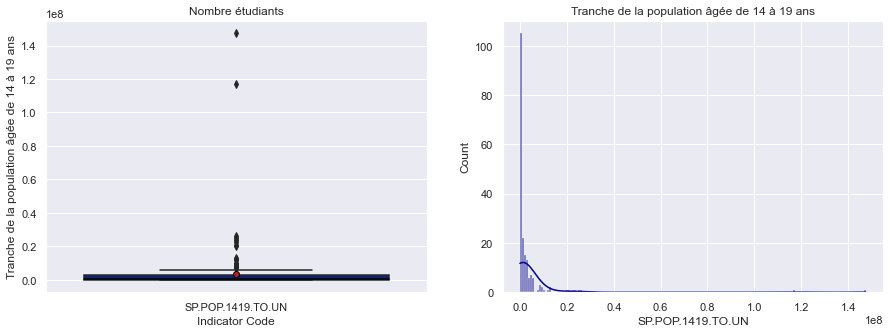

In [198]:
### tranche de population 15 à 24 ans
code="SP.POP.1419.TO.UN"
#le nombre d'indicateurs par pays et par année
df_1419=data_indic.loc[data_indic['Indicator Code']==code,:].groupby(['Country Name','Indicator Code'])[col].sum().round()
df_1419['MOY']=round(df_1419[col].mean(axis=1),0) ### moyenne par ligne 
df_1419['STDEV']=round(df_1419[col].std(axis=1),0) ### STDEV normalisée par line 
df_1419['MAX']=round(df_1419[col].max(axis=1))
df_1419['MIN']=round(df_1419[col].min(axis=1,skipna = False))
df_1419['2010-2015']=round(df_1419[last].mean(axis=1),0) ### moyenne par ligne période 2010-2015
df_1419=df_1419.sort_values(by="2010-2015", ascending=False).reset_index()
df_1419.reset_index(drop =False,inplace=True)
df_1419=df_1419.rename(columns = {'index': 'score_1419'})
### le score final = 1-score normalisé  -->  (X-Xmin)/(Xmax-Xmin)
df_1419['score_1419']=1-((df_1419['score_1419']-df_1419['score_1419'].min())/(df_1419['score_1419'].max()-df_1419['score_1419'].min()))


#Graphique statistiques sur l'  indicateur "SP.POP.1419.TO.UN"

plt.figure(figsize = (15, 5))


plt.subplot(1,2,1)
# Propriétés graphiques     
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
sns.boxplot( x=df_1419['Indicator Code'], y=df_1419['2010-2015'], showfliers=True, medianprops=medianprops, showmeans=True, meanprops=meanprops)
plt.title("Nombre étudiants")
plt.ylabel("Tranche de la population âgée de 14 à 19 ans")

plt.subplot(1,2,2)
sns.histplot(df_1419['2010-2015'], kde = True, color='Darkblue')
plt.title("Tranche de la population âgée de 14 à 19 ans")
plt.xlabel("SP.POP.1419.TO.UN")
plt.show()

In [199]:
df_1419.head(5)

,score_1419,Country Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,MOY,STDEV,MAX,MIN,2010-2015
0,1.000000,India,SP.POP.1419.TO.UN,128104130.0,130168682.0,132190049.0,134182194.0,136164942.0,138142386.0,140137640.0,142118594.0,143968264.0,145530706.0,146700941.0,147431390.0,147772401.0,147838924.0,147798490.0,147776539.0,141001642.0,6972498.0,147838924.0,128104130.0,147553114.0
1,0.994764,China,SP.POP.1419.TO.UN,123747221.0,127481206.0,131610424.0,135438745.0,138091926.0,138978921.0,137745398.0,134622902.0,130340364.0,125968221.0,122285610.0,119564021.0,117586302.0,116058511.0,114491775.0,112551654.0,126660200.0,8962205.0,138978921.0,112551654.0,117089646.0
2,0.989529,United States,SP.POP.1419.TO.UN,24161718.0,24609689.0,25032210.0,25421779.0,25773047.0,26081143.0,26347482.0,26568461.0,26729938.0,26814479.0,26814114.0,26718482.0,26543266.0,26338750.0,26172946.0,26094519.0,26013876.0,812651.0,26814479.0,24161718.0,26447013.0
3,0.984293,Indonesia,SP.POP.1419.TO.UN,26143581.0,26118237.0,26027206.0,25893978.0,25751718.0,25625378.0,25523961.0,25443925.0,25382517.0,25332504.0,25289063.0,25249111.0,25216481.0,25200578.0,25214082.0,25263531.0,25542241.0,340669.0,26143581.0,25200578.0,25238808.0
4,0.979058,Pakistan,SP.POP.1419.TO.UN,19545053.0,20453638.0,21369865.0,22231769.0,22960345.0,23501203.0,23825913.0,23953693.0,23937666.0,23857344.0,23771751.0,23708590.0,23656401.0,23589671.0,23466259.0,23262913.0,22943255.0,1347544.0,23953693.0,19545053.0,23575931.0


In [200]:
df_1419.describe()

,score_1419,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,MOY,STDEV,MAX,MIN,2010-2015
count,192.000000,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02
mean,0.500000,3.554536e+06,3.615521e+06,3.674702e+06,3.728392e+06,3.772163e+06,3.803148e+06,3.819917e+06,3.823094e+06,3.816605e+06,3.805927e+06,3.795262e+06,3.785812e+06,3.777190e+06,3.770136e+06,3.765083e+06,3.762413e+06,3.754369e+06,2.551448e+05,4.092041e+06,3.332046e+06,3.775983e+06
std,0.290941,1.327836e+07,1.357179e+07,1.388046e+07,1.417193e+07,1.440437e+07,1.454888e+07,1.459046e+07,1.454253e+07,1.443851e+07,1.432237e+07,1.422238e+07,1.414454e+07,1.407961e+07,1.402053e+07,1.395605e+07,1.387972e+07,1.410531e+07,8.742508e+05,1.509738e+07,1.270558e+07,1.404831e+07
min,0.000000,1.717000e+03,1.752000e+03,1.786000e+03,1.822000e+03,1.816000e+03,1.825000e+03,1.932000e+03,1.807000e+03,1.807000e+03,1.807000e+03,1.807000e+03,1.807000e+03,1.807000e+03,1.807000e+03,1.807000e+03,1.807000e+03,1.807000e+03,5.000000e+00,1.932000e+03,1.717000e+03,1.807000e+03
25%,0.250000,1.691475e+05,1.744850e+05,1.783862e+05,1.805285e+05,1.854162e+05,1.881542e+05,1.872938e+05,1.863540e+05,1.832662e+05,1.816695e+05,1.805442e+05,1.781320e+05,1.774745e+05,1.790648e+05,1.780278e+05,1.772265e+05,1.783255e+05,1.092775e+04,1.992832e+05,1.523532e+05,1.794915e+05
50%,0.500000,7.042515e+05,7.243050e+05,7.405100e+05,7.420790e+05,7.350670e+05,7.165315e+05,7.278340e+05,7.414355e+05,7.412395e+05,7.356935e+05,7.126100e+05,7.017635e+05,6.848655e+05,6.977675e+05,7.121385e+05,7.170605e+05,7.173370e+05,5.599150e+04,8.169430e+05,6.361040e+05,6.938405e+05
75%,0.750000,2.450793e+06,2.502254e+06,2.535953e+06,2.578841e+06,2.618652e+06,2.667205e+06,2.699283e+06,2.689290e+06,2.684920e+06,2.753534e+06,2.826034e+06,2.788233e+06,2.738469e+06,2.715132e+06,2.708722e+06,2.764624e+06,2.697900e+06,1.848815e+05,3.105962e+06,2.402213e+06,2.739314e+06
max,1.000000,1.281041e+08,1.301687e+08,1.321900e+08,1.354387e+08,1.380919e+08,1.389789e+08,1.401376e+08,1.421186e+08,1.439683e+08,1.455307e+08,1.467009e+08,1.474314e+08,1.477724e+08,1.478389e+08,1.477985e+08,1.477765e+08,1.410016e+08,8.962205e+06,1.478389e+08,1.281041e+08,1.475531e+08


## Tranche d'âge 15-24 ans

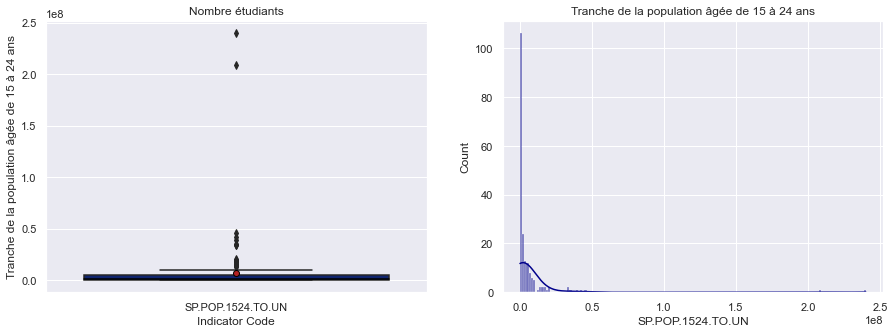

In [201]:
### tranche de population 15 à 24 ans
code="SP.POP.1524.TO.UN"
#le nombre d'indicateurs par pays et par année
df_1524=data_indic.loc[data_indic['Indicator Code']==code,:].groupby(['Country Name','Indicator Code'])[col].sum().round()
df_1524['MOY']=round(df_1524[col].mean(axis=1),0) ### moyenne par ligne 
df_1524['STDEV']=round(df_1524[col].std(axis=1),0) ### STDEV normalisée par line 
df_1524['MAX']=round(df_1524[col].max(axis=1))
df_1524['MIN']=round(df_1524[col].min(axis=1,skipna = False))
df_1524['2010-2015']=round(df_1524[last].mean(axis=1),0) ### moyenne par ligne période 2010-2015
df_1524=df_1524.sort_values(by="2010-2015", ascending=False).reset_index()
df_1524.reset_index(drop =False,inplace=True)
df_1524=df_1524.rename(columns = {'index': 'score_1524'})
### le score final = 1-score normalisé  -->  (X-Xmin)/(Xmax-Xmin)
df_1524['score_1524']=1-((df_1524['score_1524']-df_1524['score_1524'].min())/(df_1524['score_1524'].max()-df_1524['score_1524'].min()))


#Graphique statistiques sur l'  indicateur "SP.POP.1524.TO.UN"

plt.figure(figsize = (15, 5))


plt.subplot(1,2,1)
# Propriétés graphiques     
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
sns.boxplot( x=df_1524['Indicator Code'], y=df_1524['2010-2015'], showfliers=True, medianprops=medianprops, showmeans=True, meanprops=meanprops)
plt.title("Nombre étudiants")
plt.ylabel("Tranche de la population âgée de 15 à 24 ans")

plt.subplot(1,2,2)
sns.histplot(df_1524['2010-2015'], kde = True, color='Darkblue')
plt.title("Tranche de la population âgée de 15 à 24 ans")
plt.xlabel("SP.POP.1524.TO.UN")
plt.show()


In [202]:
df_1524.head(5)

,score_1524,Country Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,MOY,STDEV,MAX,MIN,2010-2015
0,1.000000,India,SP.POP.1524.TO.UN,201374377.0,204952448.0,208437037.0,211864241.0,215288312.0,218738389.0,222224219.0,225700990.0,229076220.0,232225988.0,235056806.0,237548472.0,239713636.0,241535030.0,243002731.0,244120201.0,225678694.0,14255567.0,244120201.0,201374377.0,240162813.0
1,0.994764,China,SP.POP.1524.TO.UN,197746762.0,199336400.0,203174053.0,208304084.0,213378536.0,217382824.0,220042486.0,221519350.0,221774704.0,220892800.0,218974009.0,215914397.0,211735888.0,206846521.0,201802535.0,197026759.0,210990757.0,9012424.0,221774704.0,197026759.0,208716685.0
2,0.989529,United States,SP.POP.1524.TO.UN,39234056.0,39908939.0,40626820.0,41361164.0,42080588.0,42759049.0,43388523.0,43962362.0,44459126.0,44855382.0,45137089.0,45296141.0,45343097.0,45307415.0,45230846.0,45147517.0,43381132.0,2121709.0,45343097.0,39234056.0,45243684.0
3,0.984293,Indonesia,SP.POP.1524.TO.UN,42480709.0,42676928.0,42806547.0,42873431.0,42884207.0,42846073.0,42760972.0,42634693.0,42483570.0,42328040.0,42184439.0,42057105.0,41947672.0,41865701.0,41821108.0,41819264.0,42404404.0,402474.0,42884207.0,41819264.0,41949215.0
4,0.979058,Pakistan,SP.POP.1524.TO.UN,28402154.0,29740877.0,31117004.0,32484376.0,33786653.0,34979362.0,36044512.0,36977380.0,37764830.0,38397801.0,38872192.0,39187013.0,39348176.0,39370153.0,39273580.0,39080811.0,35926680.0,3741350.0,39370153.0,28402154.0,39188654.0


In [203]:
df_1524.describe()

,score_1524,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,MOY,STDEV,MAX,MIN,2010-2015
count,192.000000,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02
mean,0.500000,5.612012e+06,5.695801e+06,5.790499e+06,5.889663e+06,5.984546e+06,6.068491e+06,6.140046e+06,6.199381e+06,6.246143e+06,6.280409e+06,6.302647e+06,6.312185e+06,6.309787e+06,6.299349e+06,6.286131e+06,6.274261e+06,6.105709e+06,4.062321e+05,6.642451e+06,5.421840e+06,6.297393e+06
std,0.290941,2.103271e+07,2.131150e+07,2.169210e+07,2.213018e+07,2.256350e+07,2.294388e+07,2.325801e+07,2.351215e+07,2.370089e+07,2.382355e+07,2.388170e+07,2.387073e+07,2.379424e+07,2.367239e+07,2.353111e+07,2.338922e+07,2.298806e+07,1.317857e+06,2.454889e+07,2.094036e+07,2.368180e+07
min,0.000000,2.724000e+03,2.778000e+03,2.833000e+03,2.892000e+03,2.948000e+03,2.732000e+03,2.825000e+03,2.819000e+03,2.819000e+03,2.819000e+03,2.819000e+03,2.819000e+03,2.819000e+03,2.819000e+03,2.819000e+03,2.819000e+03,2.819000e+03,1.900000e+01,2.948000e+03,2.724000e+03,2.819000e+03
25%,0.250000,2.666335e+05,2.732420e+05,2.794028e+05,2.802878e+05,2.881245e+05,2.948552e+05,3.009740e+05,3.095045e+05,3.108600e+05,3.090330e+05,3.062805e+05,3.014435e+05,2.974295e+05,2.933722e+05,2.903718e+05,2.945968e+05,3.044875e+05,2.000675e+04,3.233792e+05,2.323348e+05,2.946845e+05
50%,0.500000,1.083848e+06,1.116430e+06,1.126313e+06,1.147256e+06,1.173961e+06,1.201893e+06,1.225962e+06,1.229408e+06,1.233500e+06,1.229368e+06,1.235798e+06,1.225698e+06,1.207417e+06,1.183102e+06,1.157086e+06,1.158544e+06,1.232320e+06,9.065400e+04,1.326446e+06,1.054282e+06,1.189568e+06
75%,0.750000,3.718188e+06,3.879060e+06,4.041092e+06,4.200772e+06,4.280210e+06,4.345597e+06,4.397630e+06,4.436326e+06,4.466115e+06,4.484345e+06,4.521011e+06,4.508732e+06,4.544919e+06,4.653991e+06,4.610806e+06,4.519916e+06,4.353212e+06,3.083515e+05,5.016686e+06,3.718188e+06,4.604416e+06
max,1.000000,2.013744e+08,2.049524e+08,2.084370e+08,2.118642e+08,2.152883e+08,2.187384e+08,2.222242e+08,2.257010e+08,2.290762e+08,2.322260e+08,2.350568e+08,2.375485e+08,2.397136e+08,2.415350e+08,2.430027e+08,2.441202e+08,2.256787e+08,1.425557e+07,2.441202e+08,2.013744e+08,2.401628e+08


### jointure des différents résultats pour obtenir un dataframe avec l'ensemble des scores par indicateur pour chaque pays .
.

In [204]:
df_1419.iloc[:,[1,0]].sample()

,Country Name,score_1419
146,Latvia,0.235602


In [205]:
df_join=df_1419.iloc[:,[1,0]].merge(df_1524.iloc[:,:2],how='inner',on='Country Name') 
df_join=df_join.merge(df_sec.iloc[:,:2],how='inner',on='Country Name')  #tranche 15-24 ans et  nbre inscrits enseignement secondaire             
df_join=df_join.merge(df_ter.iloc[:,:2],how='inner',on='Country Name')             # nb inscrits enseignement supérieur
df_join=df_join.merge(df_it.iloc[:,:2],how='inner',on='Country Name')                   # nb acces internet 3 derniers mois
df_join=df_join.merge(df_pib.iloc[:,:2],how='inner',on='Country Name')                  # pib/habitant

In [206]:
df_join.head()

,Country Name,score_1419,score_1524,score_sec,score_ter,score_it,score_pib
0,India,1.000000,1.000000,0.321053,0.450000,0.295567,0.308901
1,China,0.994764,0.994764,0.578947,0.505556,0.541872,0.502618
2,United States,0.989529,0.989529,0.631579,0.983333,0.832512,0.937173
3,Indonesia,0.984293,0.984293,0.410526,0.483333,0.270936,0.445026
4,Pakistan,0.979058,0.979058,0.136842,0.222222,0.197044,0.287958


In [207]:
corr=df_join.corr()                   ## calcul de la matrice de corrélation
corr

,score_1419,score_1524,score_sec,score_ter,score_it,score_pib
score_1419,1.000000,0.998886,-0.214774,-0.049072,-0.255535,-0.232641
score_1524,0.998886,1.000000,-0.193177,-0.026193,-0.234521,-0.212013
score_sec,-0.214774,-0.193177,1.000000,0.851080,0.838912,0.821737
score_ter,-0.049072,-0.026193,0.851080,1.000000,0.797393,0.766591
score_it,-0.255535,-0.234521,0.838912,0.797393,1.000000,0.920384
score_pib,-0.232641,-0.212013,0.821737,0.766591,0.920384,1.000000


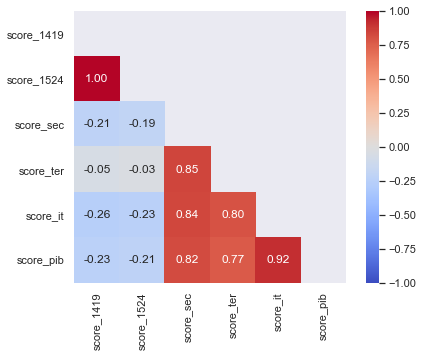

In [208]:
### affichage de la matrice de corrélation
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig,ax=plt.subplots(1,1,figsize=(7,5))
ax=sns.heatmap(corr,mask=mask,vmin=-1,vmax=1,cmap='coolwarm',annot=True,fmt=".2f",square=True)

On observe une corrélation importante :

entre le score_pib et le le score_it. On peut l'expliquer : Plus le pib /hab est important , plus les ressources personnelles sont elevées  et donc l'accès à l'internet ou à un pc personnel est facilité. 

entre le score_it et le score_sec. : plus il y a d'étudiants en secondaire plus il y a d'accès à internet\
entre le score_it et le score_ter. : idem pour les étudiants de l'enseignement supérieur
--> Ce sont des constatations très intéressantes pour notre objectif de promouvoir des cours en ligne

entre le score_ter et le score_sec . Assez normal: plus il y a d inscrits en secondaire, plus on devrait trouver d'inscrits à l'enseignement supérieur.


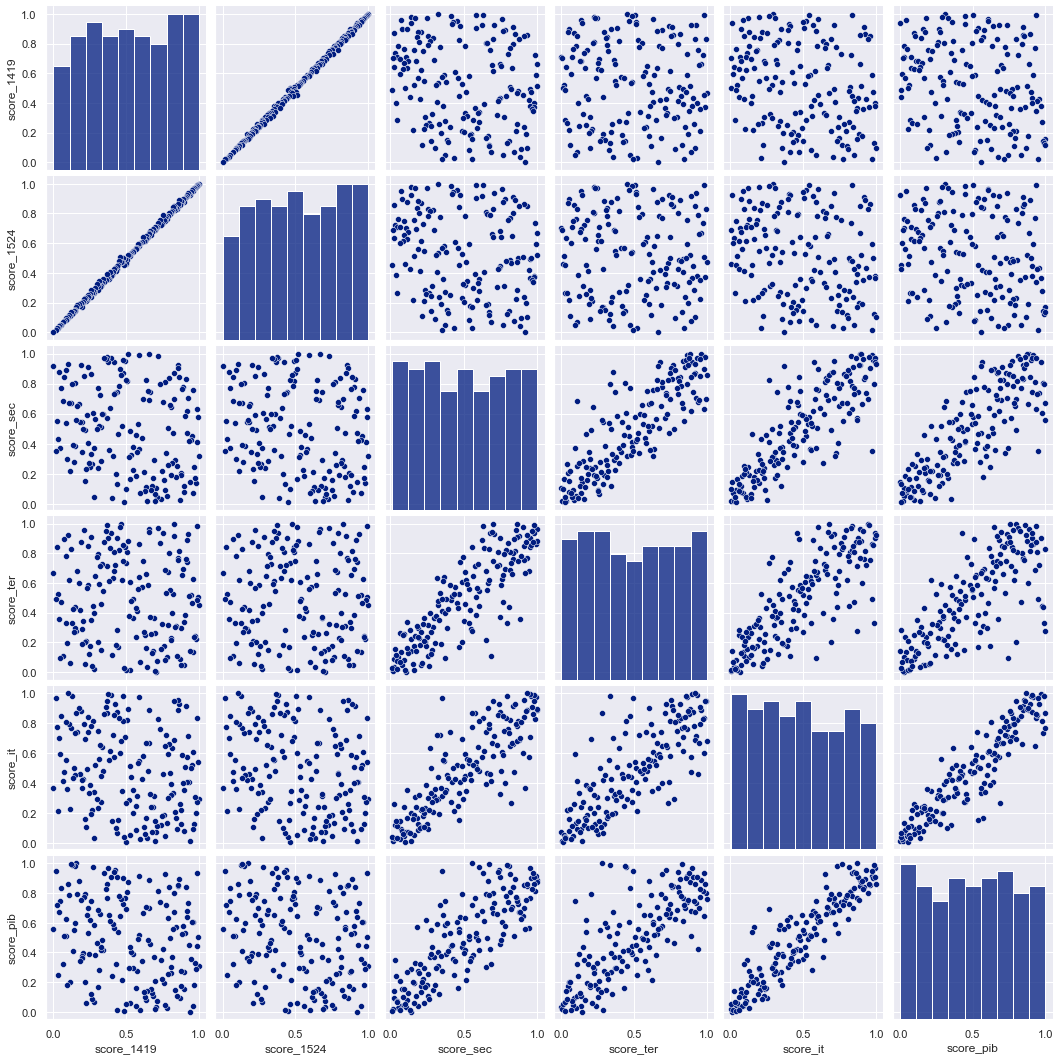

In [209]:
sns.pairplot(df_join)

### 1 Correlation entre les scores pib/hab et taux d'accès à l'internet

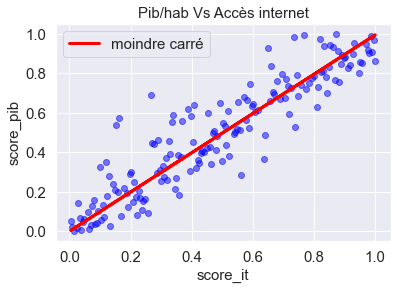

In [210]:
X = df_join["score_it"].values.reshape(-1,1)
Y = df_join["score_pib"]
#(Moindres Carrés Ordinaire
ols=sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)

BIGGER_SIZE = 15
plt.rc('font', size=BIGGER_SIZE) # taille de texte par défaut
plt.rc('axes', titlesize=BIGGER_SIZE) # taille des titres des axes
plt.rc('axes', labelsize=BIGGER_SIZE) # taille des labels des axes
plt.rc('xtick', labelsize=BIGGER_SIZE) # taille des ticks des abscisses
plt.rc('ytick', labelsize=BIGGER_SIZE) # taille des ticks des ordonnées
plt.rc('legend', fontsize=BIGGER_SIZE) # taille de la légende
plt.rc('figure', titlesize=BIGGER_SIZE) # taille du titre
plt.figure()
plt.title("Pib/hab Vs Accès internet")
plt.scatter(X, Y, color='blue',alpha=0.5)
plt.plot(X,ols.predict(X), color='red', linewidth=3, label="moindre carré")
plt.xlabel("score_it")
plt.ylabel("score_pib")
plt.legend()
plt.show()

In [211]:
# Instanciation:
reg_linb = smf.ols("score_it ~ score_pib", data = df_join)
# Calculs:
res_lin = reg_linb.fit()
print(res_lin.summary())

                            OLS Regression Results                            
Dep. Variable:               score_it   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     908.6
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           8.90e-69
Time:                        17:34:28   Log-Likelihood:                 125.66
No. Observations:                 166   AIC:                            -247.3
Df Residuals:                     164   BIC:                            -241.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0273      0.018      1.553      0.1

R carré ajusté a une valeur robuste 0.84 qui confirme l'adéquation de la régression linéaire avec la matrice de points.

### 2. Corrélation entre les scores de Taux d'étudiants et d' accès à l'internet

Text(0, 0.5, 'score_ter')

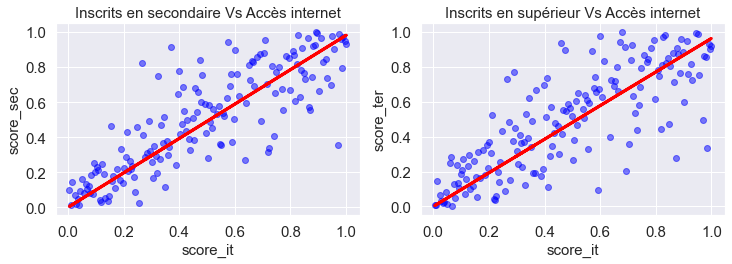

In [212]:
plt.figure(figsize=(12, 12))

plt.subplot(321)
X = df_join["score_it"].values.reshape(-1,1)
Y = df_join["score_sec"]
#(Moindres Carrés Ordinaire
ols=sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
plt.title("Inscrits en secondaire Vs Accès internet")
plt.scatter(X, Y, color='blue', label=None,alpha=0.5)
plt.plot(X, ols.predict(X), color='red', linewidth=3, label="")
plt.xlabel("score_it")
plt.ylabel("score_sec")
#plt.legend()

plt.subplot(322)
X = df_join["score_it"].values.reshape(-1,1)
Y = df_join["score_ter"]
#(Moindres Carrés Ordinaire
ols=sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
plt.title("Inscrits en supérieur Vs Accès internet")
plt.scatter(X, Y, color='blue', label=None,alpha=0.5)
plt.plot(X, ols.predict(X), color='red', linewidth=3, label="")
plt.xlabel("score_it")
plt.ylabel("score_ter")
#plt.legend();


In [213]:
# Instanciation:
reg_linb = smf.ols("score_it ~ score_ter+score_sec ", data = df_join)
# Calculs:
res_lin = reg_linb.fit()
print(res_lin.summary())

                            OLS Regression Results                            
Dep. Variable:               score_it   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           6.10e-47
Time:                        17:34:28   Log-Likelihood:                 78.153
No. Observations:                 166   AIC:                            -150.3
Df Residuals:                     163   BIC:                            -141.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0514      0.024      2.150      0.0

### 3.Corrélation entre les scores de pib/hab  et  de tranches âge

Text(0, 0.5, 'score_1524')

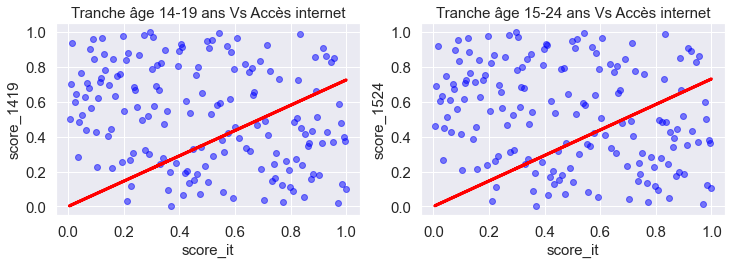

In [214]:
plt.figure(figsize=(12, 12))

plt.subplot(321)
X = df_join["score_it"].values.reshape(-1,1)
Y = df_join["score_1419"]
#(Moindres Carrés Ordinaire
ols=sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
plt.title("Tranche âge 14-19 ans Vs Accès internet")
plt.scatter(X, Y, color='blue', label=None,alpha=0.5)
plt.plot(X, ols.predict(X), color='red', linewidth=3, label="")
plt.xlabel("score_it")
plt.ylabel("score_1419")
#plt.legend()

plt.subplot(322)
X = df_join["score_it"].values.reshape(-1,1)
Y = df_join["score_1524"]
#(Moindres Carrés Ordinaire
ols=sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
plt.title("Tranche âge 15-24 ans Vs Accès internet")
plt.scatter(X, Y, color='blue', label=None,alpha=0.5)
plt.plot(X, ols.predict(X), color='red', linewidth=3, label="")
plt.xlabel("score_it")
plt.ylabel("score_1524")
#plt.legend();


In [215]:
# Instanciation:
reg_linb = smf.ols("score_it ~ score_1419+score_1524 ", data = df_join)
# Calculs:
res_lin = reg_linb.fit()
print(res_lin.summary())

                            OLS Regression Results                            
Dep. Variable:               score_it   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     28.38
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           2.65e-11
Time:                        17:34:29   Log-Likelihood:                -5.4167
No. Observations:                 166   AIC:                             16.83
Df Residuals:                     163   BIC:                             26.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6093      0.041     14.932      0.0

Le coéfficient de détermination R2 est faible. Ce qui signifie que seulement 25% des variations sont expliquées par des points de la droite de régression

 ### score_tot = somme des scores des indicateurs par pays  
 
 score_tot = (score_1419+score_1524)/2+score_sec+score_ter+score_it+score_pib
 
* la moyenne des scores de tranches d'âge

In [223]:
## ajout colonne score_tot

col = df_join.columns[3:7]
col_age=df_join.columns[1:3]
df_join['score_tot']=(df_join[col].sum(axis=1)+(df_join[col_age].sum(axis=1))/2)/(len(col)+len(col_age))
score=df_join.sort_values(by='score_tot',ascending= False).reset_index(drop=True)

In [227]:
print("les 10 meilleurs candidats pour l'expansion à l'international sont :")
score.head(10)

les 10 meilleurs candidats pour l'expansion à l'international sont :


,Country Name,score_1419,score_1524,score_sec,score_ter,score_it,score_pib,score_tot
0,Australia,0.659686,0.670157,1.000000,0.961111,0.891626,0.890052,0.734618
1,United States,0.989529,0.989529,0.631579,0.983333,0.832512,0.937173,0.729021
2,Germany,0.863874,0.890052,0.847368,0.816667,0.926108,0.895288,0.727066
3,Netherlands,0.586387,0.596859,0.989474,0.861111,0.975369,0.916230,0.722301
4,United Kingdom,0.853403,0.863874,0.905263,0.755556,0.955665,0.853403,0.721421
5,Spain,0.722513,0.732984,0.984211,0.972222,0.827586,0.811518,0.720548
6,France,0.858639,0.853403,0.926316,0.766667,0.886700,0.848168,0.713978
7,"Korea, Rep.",0.827225,0.827225,0.700000,0.994444,0.945813,0.801047,0.711422
8,Japan,0.910995,0.910995,0.831579,0.761111,0.916256,0.842932,0.710479
9,Denmark,0.397906,0.382199,0.973684,0.933333,0.990148,0.905759,0.698829


In [225]:
top_10=score.head(10)

In [219]:
### enregistre  le résultat dans un fichier  score.scv 
score.to_csv('C:\\Users\\serge\\OneDrive\\Documents\\Documents\\DATA SCIENTIST\\P2\score.csv',index=False)

## Score par région et par Income Group

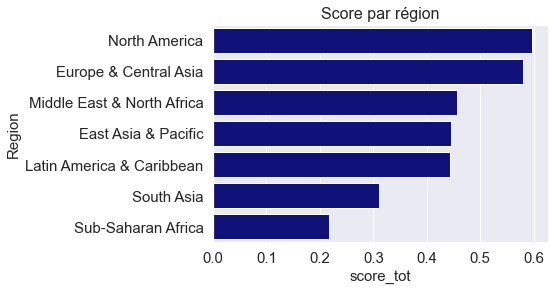

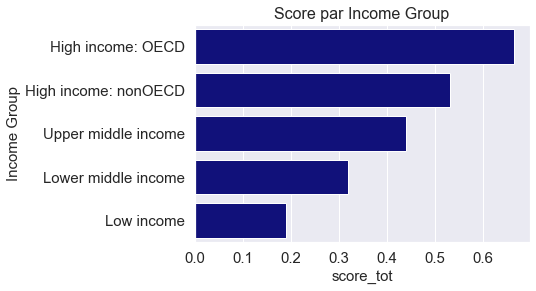

In [220]:
## score par région
score_region=pd.merge(score.iloc[:,[0,7]],data_indic.iloc[:,[0,5]],how='inner',on='Country Name')
score_moy_region=score_region.groupby('Region').mean()['score_tot'].reset_index().sort_values( by ='score_tot',ascending = False)
score_moy_region=score_moy_region.reset_index().iloc[:,1:3]
# score par carégorie de rentrée
score_income=pd.merge(score.iloc[:,[0,7]],data_indic.iloc[:,[0,6]],how='inner',on='Country Name')
score_moy_income=score_income.groupby('Income Group').mean()['score_tot'].reset_index().sort_values( by ='score_tot',ascending = False)
score_moy_income=score_moy_income.reset_index().iloc[:,1:3]
# graphique par région
plt.title("Score par région",fontsize=16)
sns.barplot(data=score_moy_region,y='Region' ,x ='score_tot',color='darkblue')
plt.show()
# graphique par Group Income
plt.title("Score par Income Group",fontsize=16)
sns.barplot(data=score_moy_income,y='Income Group' ,x ='score_tot',color='darkblue');

plt.show()

## Meilleur score pour les régions : North america  et  Europe & Central Asia
## Meilleur score pour les niveaux de revenus :   High income OECD & non OECD


In [221]:
score_moy_region

,Region,score_tot
0,North America,0.596468
1,Europe & Central Asia,0.579264
2,Middle East & North Africa,0.455742
3,East Asia & Pacific,0.444866
4,Latin America & Caribbean,0.443831
5,South Asia,0.310526
6,Sub-Saharan Africa,0.216947


In [222]:
score_moy_income

,Income Group,score_tot
0,High income: OECD,0.663881
1,High income: nonOECD,0.531503
2,Upper middle income,0.439963
3,Lower middle income,0.319361
4,Low income,0.189560


#### Il existe d'autres approches :

#### Si l'entreprise recherche en priorité l'aspect financier et le profit ou si au contraire  la vocation première est basée sur l'aspect humanitaire , la cible ne sera pas la même . Il faudra dès lors pondérer certains indicateurs voire ne pas prendre en compte.

#### il y a lieu de voir également comment  les cours en ligne seront libellés : en Anglais , Français ou dans la langue du pays ?
#### Si les cours  sont mis en ligne en français , le travail(et donc les coûts...) pour la start_up sera fortement réduit mais la cible se limitera à des pays francophones.
#### Si les cours sont édités en anglais , il y aura un coût supplémentaire pour la mise en oeuvre  mais le panel visé sera beaucoup plus large. 
#### Si les cours sont proposés dans la langue du pays , le coût( et le délai...) de la mise en oeuvre sera nettement supérieur et le public visé sera maximum.

